<a href="https://colab.research.google.com/github/zeeshanrafiqrana/DS-RegressionAnalysis/blob/main/s4_e12_regression_analysis_for_insurance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt;
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

** Insurance Premium Prediction Dataset **

# Problem Statement:
The goal of this dataset is to facilitate the development and testing of regression models for predicting insurance premiums based on various customer characteristics and policy details. Insurance companies often rely on data-driven approaches to estimate premiums, taking into account factors such as age, income, health status, and claim history. This synthetic dataset simulates real-world scenarios to help practitioners practice feature engineering, data cleaning, and model training.

# Dataset Overview
This dataset contains 2Lk+ and 20 features with a mix of categorical, numerical, and text data. It includes missing values, incorrect data types, and skewed distributions to mimic the complexities faced in real-world datasets. The target variable for prediction is the "Premium Amount".

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Understanding

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Folder/playground-series-s4e12/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Folder/playground-series-s4e12/test.csv')

In [4]:
df_train.head()

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Policy Start Date  \
0         17.0         372.0                 5.0  2023-12-23 15:21:39.134960   
1         12.0         694.0                 2.0  2023-06-12 15:21:39.111551   
2         14.0           NaN                 3.0  2023-09-30 15:21:39.221386   
3          0.0         367.0                 1.0  2024-06-12 15:21:39.226954   
4          8.0         598.0                 4.0  2021-12-01 15:21:39.252145   

  Customer Feedback Smoking Status Exercise Frequency Property Type  \
0              Poor             No             Weekly         House   
1           Average            Yes            Monthly         House   
2              Good            Yes             Weekly         House   
3              Poor            Yes              Daily     Apartment   
4              Poor            Yes             Weekly         House   

  Premium Amount  
0         2869.0  
1         1483.0  
2          567.0  
3          765.0  
4         2022.0  

[5 rows x 21 columns]

In [ ]:
df_train.tail(5)

id   Age  Gender  Annual Income Marital Status  \
1199995  1199995  36.0  Female        27316.0        Married   
1199996  1199996  54.0    Male        35786.0       Divorced   
1199997  1199997  19.0    Male        51884.0       Divorced   
1199998  1199998  55.0    Male            NaN         Single   
1199999  1199999  21.0  Female            NaN       Divorced   

         Number of Dependents Education Level     Occupation  Health Score  \
1199995                   0.0        Master's     Unemployed     13.772907   
1199996                   NaN        Master's  Self-Employed     11.483482   
1199997                   0.0        Master's            NaN     14.724469   
1199998                   1.0             PhD            NaN     18.547381   
1199999                   0.0             PhD            NaN     10.125323   

         Location  ... Previous Claims  Vehicle Age  Credit Score  \
1199995     Urban  ...             NaN          5.0         372.0   
1199996     Rural  ...             NaN         10.0         597.0   
1199997  Suburban  ...             0.0         19.0           NaN   
1199998  Suburban  ...             1.0          7.0         407.0   
1199999     Rural  ...             0.0         18.0         502.0   

         Insurance Duration           Policy Start Date Customer Feedback  \
1199995                 3.0  2023-05-03 15:21:39.257696              Poor   
1199996                 4.0  2022-09-10 15:21:39.134960              Poor   
1199997                 6.0  2021-05-25 15:21:39.106582              Good   
1199998                 4.0  2021-09-19 15:21:39.190215              Poor   
1199999                 6.0  2020-08-26 15:21:39.155231              Good   

        Smoking Status Exercise Frequency Property Type Premium Amount  
1199995             No              Daily     Apartment         1303.0  
1199996             No             Weekly     Apartment          821.0  
1199997             No            Monthly         Condo          371.0  
1199998             No              Daily     Apartment          596.0  
1199999            Yes            Monthly         House         2480.0  

[5 rows x 21 columns]

In [ ]:
print(f"datsest info {df_train.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [ ]:
df_train.describe().T

count           mean            std         min  \
id                    1200000.0  599999.500000  346410.305851    0.000000   
Age                   1181295.0      41.145563      13.539950   18.000000   
Annual Income         1155051.0   32745.217777   32179.506124    1.000000   
Number of Dependents  1090328.0       2.009934       1.417338    0.000000   
Health Score          1125924.0      25.613908      12.203462    2.012237   
Previous Claims        835971.0       1.002689       0.982840    0.000000   
Vehicle Age           1199994.0       9.569889       5.776189    0.000000   
Credit Score          1062118.0     592.924350     149.981945  300.000000   
Insurance Duration    1199999.0       5.018219       2.594331    1.000000   
Premium Amount        1200000.0    1102.544822     864.998859   20.000000   

                                25%            50%            75%  \
id                    299999.750000  599999.500000  899999.250000   
Age                       30.000000      41.000000      53.000000   
Annual Income           8001.000000   23911.000000   44634.000000   
Number of Dependents       1.000000       2.000000       3.000000   
Health Score              15.918959      24.578648      34.527209   
Previous Claims            0.000000       1.000000       2.000000   
Vehicle Age                5.000000      10.000000      15.000000   
Credit Score             468.000000     595.000000     721.000000   
Insurance Duration         3.000000       5.000000       7.000000   
Premium Amount           514.000000     872.000000    1509.000000   

                               max  
id                    1.199999e+06  
Age                   6.400000e+01  
Annual Income         1.499970e+05  
Number of Dependents  4.000000e+00  
Health Score          5.897591e+01  
Previous Claims       9.000000e+00  
Vehicle Age           1.900000e+01  
Credit Score          8.490000e+02  
Insurance Duration    9.000000e+00  
Premium Amount        4.999000e+03

In [ ]:
df_train.describe(include = 'object').T

count  unique                         top    freq
Gender              1200000       2                        Male  602571
Marital Status      1181471       3                      Single  395391
Education Level     1200000       4                    Master's  303818
Occupation           841925       3                    Employed  282750
Location            1200000       3                    Suburban  401542
Policy Type         1200000       3                     Premium  401846
Policy Start Date   1200000  167381  2020-02-08 15:21:39.134960     142
Customer Feedback   1122176       3                     Average  377905
Smoking Status      1200000       2                         Yes  601873
Exercise Frequency  1200000       4                      Weekly  306179
Property Type       1200000       3                       House  400349

Descriptive Overview of the Typical Client:

* **Demographics:** Middle-aged individual (average age around 41 years), typically with two dependents

* **Financial Profile:** Annual income averaging approximately $51,032, with a moderate credit score (around 592)
  
* **Vehicle Ownership:** Owns a vehicle averaging about 9.5 years old
  
* **Insurance History:** Insured for an average of 5 years, with a typical history of previous claims
  
* **Economic Characteristics:** Moderate income bracket with a slightly lower than average credit rating
  
* **Premium and Claims:** Average insurance premium of about $1,102, with variability in previous insurance claims*

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_test.duplicated().sum()

0

In [ ]:
print(f"training dataset shape: {df_train.shape}")
print(f"testing dataset: {df_test.shape}")

training dataset shape: (1200000, 21)
testing dataset: (800000, 20)


In [ ]:
df_train.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [ ]:
df_train.dtypes

id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object

In [ ]:
df_train.count()

id                      1200000
Age                     1181295
Gender                  1200000
Annual Income           1155051
Marital Status          1181471
Number of Dependents    1090328
Education Level         1200000
Occupation               841925
Health Score            1125924
Location                1200000
Policy Type             1200000
Previous Claims          835971
Vehicle Age             1199994
Credit Score            1062118
Insurance Duration      1199999
Policy Start Date       1200000
Customer Feedback       1122176
Smoking Status          1200000
Exercise Frequency      1200000
Property Type           1200000
Premium Amount          1200000
dtype: int64

# Data Wrangling

In [ ]:
#check missing values
df_train.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [ ]:
df_test.isnull().sum()

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

In [ ]:
df_train['Premium Amount'].isnull().sum()

0

In [ ]:
#find the percentage of missing values
missing_data = df_train.isnull().mean() * 100
for col, pct in missing_data.items():
    print(f"{col} - {pct:.2f}%")

id - 0.00%
Age - 1.56%
Gender - 0.00%
Annual Income - 3.75%
Marital Status - 1.54%
Number of Dependents - 9.14%
Education Level - 0.00%
Occupation - 29.84%
Health Score - 6.17%
Location - 0.00%
Policy Type - 0.00%
Previous Claims - 30.34%
Vehicle Age - 0.00%
Credit Score - 11.49%
Insurance Duration - 0.00%
Policy Start Date - 0.00%
Customer Feedback - 6.49%
Smoking Status - 0.00%
Exercise Frequency - 0.00%
Property Type - 0.00%
Premium Amount - 0.00%


In [ ]:
train = df_train.drop(['id'], axis =1)
train.head()

Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  19.0  Female        10049.0        Married                   1.0   
1  39.0  Female        31678.0       Divorced                   3.0   
2  23.0    Male        25602.0       Divorced                   3.0   
3  21.0    Male       141855.0        Married                   2.0   
4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed     22.598761     Urban        Premium   
1        Master's            NaN     15.569731     Rural  Comprehensive   
2     High School  Self-Employed     47.177549  Suburban        Premium   
3      Bachelor's            NaN     10.938144     Rural          Basic   
4      Bachelor's  Self-Employed     20.376094     Rural        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              2.0         17.0         372.0                 5.0   
1              1.0         12.0         694.0                 2.0   
2              1.0         14.0           NaN                 3.0   
3              1.0          0.0         367.0                 1.0   
4              0.0          8.0         598.0                 4.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-12-23 15:21:39.134960              Poor             No   
1  2023-06-12 15:21:39.111551           Average            Yes   
2  2023-09-30 15:21:39.221386              Good            Yes   
3  2024-06-12 15:21:39.226954              Poor            Yes   
4  2021-12-01 15:21:39.252145              Poor            Yes   

  Exercise Frequency Property Type  Premium Amount  
0             Weekly         House          2869.0  
1            Monthly         House          1483.0  
2             Weekly         House           567.0  
3              Daily     Apartment           765.0  
4             Weekly         House          2022.0

In [ ]:
# test = df_test.drop(['id'], axis=1)
test = df_test.copy()
test.head()

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  1200000  28.0  Female         2310.0            NaN                   4.0   
1  1200001  31.0  Female       126031.0        Married                   2.0   
2  1200002  47.0  Female        17092.0       Divorced                   0.0   
3  1200003  28.0  Female        30424.0       Divorced                   3.0   
4  1200004  24.0    Male        10863.0       Divorced                   2.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed      7.657981     Rural          Basic   
1        Master's  Self-Employed     13.381379  Suburban        Premium   
2             PhD     Unemployed     24.354527     Urban  Comprehensive   
3             PhD  Self-Employed      5.136225  Suburban  Comprehensive   
4     High School     Unemployed     11.844155  Suburban        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              NaN         19.0           NaN                 1.0   
1              NaN         14.0         372.0                 8.0   
2              NaN         16.0         819.0                 9.0   
3              1.0          3.0         770.0                 5.0   
4              NaN         14.0         755.0                 7.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-06-04 15:21:39.245086              Poor            Yes   
1  2024-04-22 15:21:39.224915              Good            Yes   
2  2023-04-05 15:21:39.134960           Average            Yes   
3  2023-10-25 15:21:39.134960              Poor            Yes   
4  2021-11-26 15:21:39.259788           Average             No   

  Exercise Frequency Property Type  
0             Weekly         House  
1             Rarely     Apartment  
2            Monthly         Condo  
3              Daily         House  
4             Weekly         House

In [ ]:
train.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

Handle MIssing Values

In [ ]:
#Numeric Columns
numeric_records = train.select_dtypes(include=np.number)
numeric_records

Age  Annual Income  Number of Dependents  Health Score  \
0        19.0        10049.0                   1.0     22.598761   
1        39.0        31678.0                   3.0     15.569731   
2        23.0        25602.0                   3.0     47.177549   
3        21.0       141855.0                   2.0     10.938144   
4        21.0        39651.0                   1.0     20.376094   
...       ...            ...                   ...           ...   
1199995  36.0        27316.0                   0.0     13.772907   
1199996  54.0        35786.0                   NaN     11.483482   
1199997  19.0        51884.0                   0.0     14.724469   
1199998  55.0            NaN                   1.0     18.547381   
1199999  21.0            NaN                   0.0     10.125323   

         Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0                    2.0         17.0         372.0                 5.0   
1                    1.0         12.0         694.0                 2.0   
2                    1.0         14.0           NaN                 3.0   
3                    1.0          0.0         367.0                 1.0   
4                    0.0          8.0         598.0                 4.0   
...                  ...          ...           ...                 ...   
1199995              NaN          5.0         372.0                 3.0   
1199996              NaN         10.0         597.0                 4.0   
1199997              0.0         19.0           NaN                 6.0   
1199998              1.0          7.0         407.0                 4.0   
1199999              0.0         18.0         502.0                 6.0   

         Premium Amount  
0                2869.0  
1                1483.0  
2                 567.0  
3                 765.0  
4                2022.0  
...                 ...  
1199995          1303.0  
1199996           821.0  
1199997           371.0  
1199998           596.0  
1199999          2480.0  

[1200000 rows x 9 columns]

In [ ]:
def preprocess_numerical_features(df):
    """
    Preprocess the numerical features by filling in missings.

    Args:
        df: pandas dataframe

    Returns: pandas dataframe with filled missings

    """
    df = df.copy()

    df['Number of Dependents'].fillna(df['Number of Dependents'].median(), inplace=True)
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Vehicle Age'].fillna(df['Vehicle Age'].median(), inplace=True)
    df['Previous Claims'].fillna(df['Previous Claims'].median(), inplace=True)
    df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)
    df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)
    df['Insurance Duration'].fillna(df['Insurance Duration'].median(), inplace=True)
    df['Health Score'].fillna(df['Health Score'].median(), inplace=True)

    return df

In [ ]:
# Impute numerical columns
train = preprocess_numerical_features(train)
train.head()

Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  19.0  Female        10049.0        Married                   1.0   
1  39.0  Female        31678.0       Divorced                   3.0   
2  23.0    Male        25602.0       Divorced                   3.0   
3  21.0    Male       141855.0        Married                   2.0   
4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed     22.598761     Urban        Premium   
1        Master's            NaN     15.569731     Rural  Comprehensive   
2     High School  Self-Employed     47.177549  Suburban        Premium   
3      Bachelor's            NaN     10.938144     Rural          Basic   
4      Bachelor's  Self-Employed     20.376094     Rural        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              2.0         17.0         372.0                 5.0   
1              1.0         12.0         694.0                 2.0   
2              1.0         14.0         595.0                 3.0   
3              1.0          0.0         367.0                 1.0   
4              0.0          8.0         598.0                 4.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-12-23 15:21:39.134960              Poor             No   
1  2023-06-12 15:21:39.111551           Average            Yes   
2  2023-09-30 15:21:39.221386              Good            Yes   
3  2024-06-12 15:21:39.226954              Poor            Yes   
4  2021-12-01 15:21:39.252145              Poor            Yes   

  Exercise Frequency Property Type  Premium Amount  
0             Weekly         House          2869.0  
1            Monthly         House          1483.0  
2             Weekly         House           567.0  
3              Daily     Apartment           765.0  
4             Weekly         House          2022.0

In [ ]:
test = preprocess_numerical_features(test)
test.head()

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  1200000  28.0  Female         2310.0            NaN                   4.0   
1  1200001  31.0  Female       126031.0        Married                   2.0   
2  1200002  47.0  Female        17092.0       Divorced                   0.0   
3  1200003  28.0  Female        30424.0       Divorced                   3.0   
4  1200004  24.0    Male        10863.0       Divorced                   2.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed      7.657981     Rural          Basic   
1        Master's  Self-Employed     13.381379  Suburban        Premium   
2             PhD     Unemployed     24.354527     Urban  Comprehensive   
3             PhD  Self-Employed      5.136225  Suburban  Comprehensive   
4     High School     Unemployed     11.844155  Suburban        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              1.0         19.0         595.0                 1.0   
1              1.0         14.0         372.0                 8.0   
2              1.0         16.0         819.0                 9.0   
3              1.0          3.0         770.0                 5.0   
4              1.0         14.0         755.0                 7.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-06-04 15:21:39.245086              Poor            Yes   
1  2024-04-22 15:21:39.224915              Good            Yes   
2  2023-04-05 15:21:39.134960           Average            Yes   
3  2023-10-25 15:21:39.134960              Poor            Yes   
4  2021-11-26 15:21:39.259788           Average             No   

  Exercise Frequency Property Type  
0             Weekly         House  
1             Rarely     Apartment  
2            Monthly         Condo  
3              Daily         House  
4             Weekly         House

In [ ]:
def get_policy_start_date_features(df):

    df = df.copy()
    df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')
    df['Policy Start Year'] = df['Policy Start Date'].dt.year
    df['Policy Start Month'] = df['Policy Start Date'].dt.month
    df['Policy Start Day'] = df['Policy Start Date'].dt.day
    df['Policy Start DayOfWeek'] = df['Policy Start Date'].dt.dayofweek
    df['Policy Tenure'] = (pd.Timestamp.now() - df['Policy Start Date']).dt.days / 365.25

    df = df.drop(columns=['Policy Start Date'])

    return df

In [ ]:
test = get_policy_start_date_features(test)
test.head()

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  1200000  28.0  Female         2310.0            NaN                   4.0   
1  1200001  31.0  Female       126031.0        Married                   2.0   
2  1200002  47.0  Female        17092.0       Divorced                   0.0   
3  1200003  28.0  Female        30424.0       Divorced                   3.0   
4  1200004  24.0    Male        10863.0       Divorced                   2.0   

  Education Level     Occupation  Health Score  Location  ...  \
0      Bachelor's  Self-Employed      7.657981     Rural  ...   
1        Master's  Self-Employed     13.381379  Suburban  ...   
2             PhD     Unemployed     24.354527     Urban  ...   
3             PhD  Self-Employed      5.136225  Suburban  ...   
4     High School     Unemployed     11.844155  Suburban  ...   

  Insurance Duration  Customer Feedback  Smoking Status  Exercise Frequency  \
0                1.0               Poor             Yes              Weekly   
1                8.0               Good             Yes              Rarely   
2                9.0            Average             Yes             Monthly   
3                5.0               Poor             Yes               Daily   
4                7.0            Average              No              Weekly   

   Property Type Policy Start Year Policy Start Month Policy Start Day  \
0          House              2023                  6                4   
1      Apartment              2024                  4               22   
2          Condo              2023                  4                5   
3          House              2023                 10               25   
4          House              2021                 11               26   

  Policy Start DayOfWeek  Policy Tenure  
0                      6       1.527721  
1                      0       0.643395  
2                      2       1.691992  
3                      2       1.136208  
4                      4       3.047228  

[5 rows x 24 columns]

In [ ]:
train = get_policy_start_date_features(train)
train.head()

Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  19.0  Female        10049.0        Married                   1.0   
1  39.0  Female        31678.0       Divorced                   3.0   
2  23.0    Male        25602.0       Divorced                   3.0   
3  21.0    Male       141855.0        Married                   2.0   
4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location    Policy Type  ...  \
0      Bachelor's  Self-Employed     22.598761     Urban        Premium  ...   
1        Master's            NaN     15.569731     Rural  Comprehensive  ...   
2     High School  Self-Employed     47.177549  Suburban        Premium  ...   
3      Bachelor's            NaN     10.938144     Rural          Basic  ...   
4      Bachelor's  Self-Employed     20.376094     Rural        Premium  ...   

   Customer Feedback  Smoking Status  Exercise Frequency  Property Type  \
0               Poor              No              Weekly          House   
1            Average             Yes             Monthly          House   
2               Good             Yes              Weekly          House   
3               Poor             Yes               Daily      Apartment   
4               Poor             Yes              Weekly          House   

  Premium Amount Policy Start Year Policy Start Month Policy Start Day  \
0         2869.0              2023                 12               23   
1         1483.0              2023                  6               12   
2          567.0              2023                  9               30   
3          765.0              2024                  6               12   
4         2022.0              2021                 12                1   

   Policy Start DayOfWeek  Policy Tenure  
0                       5       0.974675  
1                       0       1.505818  
2                       5       1.204654  
3                       2       0.503765  
4                       2       3.033539  

[5 rows x 24 columns]

In [ ]:
#Categorical Columns
categorical_records = train.select_dtypes(include='object')
categorical_records

Gender Marital Status Education Level     Occupation  Location  \
0        Female        Married      Bachelor's  Self-Employed     Urban   
1        Female       Divorced        Master's            NaN     Rural   
2          Male       Divorced     High School  Self-Employed  Suburban   
3          Male        Married      Bachelor's            NaN     Rural   
4          Male         Single      Bachelor's  Self-Employed     Rural   
...         ...            ...             ...            ...       ...   
1199995  Female        Married        Master's     Unemployed     Urban   
1199996    Male       Divorced        Master's  Self-Employed     Rural   
1199997    Male       Divorced        Master's            NaN  Suburban   
1199998    Male         Single             PhD            NaN  Suburban   
1199999  Female       Divorced             PhD            NaN     Rural   

           Policy Type Customer Feedback Smoking Status Exercise Frequency  \
0              Premium              Poor             No             Weekly   
1        Comprehensive           Average            Yes            Monthly   
2              Premium              Good            Yes             Weekly   
3                Basic              Poor            Yes              Daily   
4              Premium              Poor            Yes             Weekly   
...                ...               ...            ...                ...   
1199995        Premium              Poor             No              Daily   
1199996  Comprehensive              Poor             No             Weekly   
1199997          Basic              Good             No            Monthly   
1199998        Premium              Poor             No              Daily   
1199999        Premium              Good            Yes            Monthly   

        Property Type  
0               House  
1               House  
2               House  
3           Apartment  
4               House  
...               ...  
1199995     Apartment  
1199996     Apartment  
1199997         Condo  
1199998     Apartment  
1199999         House  

[1200000 rows x 10 columns]

In [ ]:
categorical_records.isnull().sum()

Gender                     0
Marital Status         18529
Education Level            0
Occupation            358075
Location                   0
Policy Type                0
Customer Feedback      77824
Smoking Status             0
Exercise Frequency         0
Property Type              0
dtype: int64

In [ ]:
train['Customer Feedback'].unique()

array(['Poor', 'Average', 'Good', nan], dtype=object)

In [ ]:
numeric_records.columns

Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

# EDA

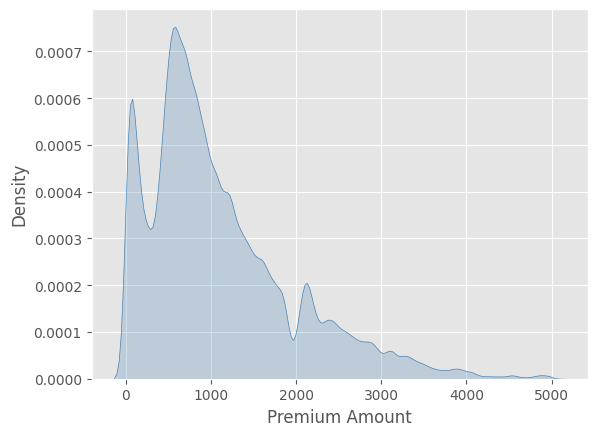

In [ ]:
plt.style.use('ggplot')
sns.kdeplot(data=train, x='Premium Amount', color='steelblue', fill=True);

From above figure the distribution is right-skewed. Next, we explore potential relationships between the input features and `Premium Amount`

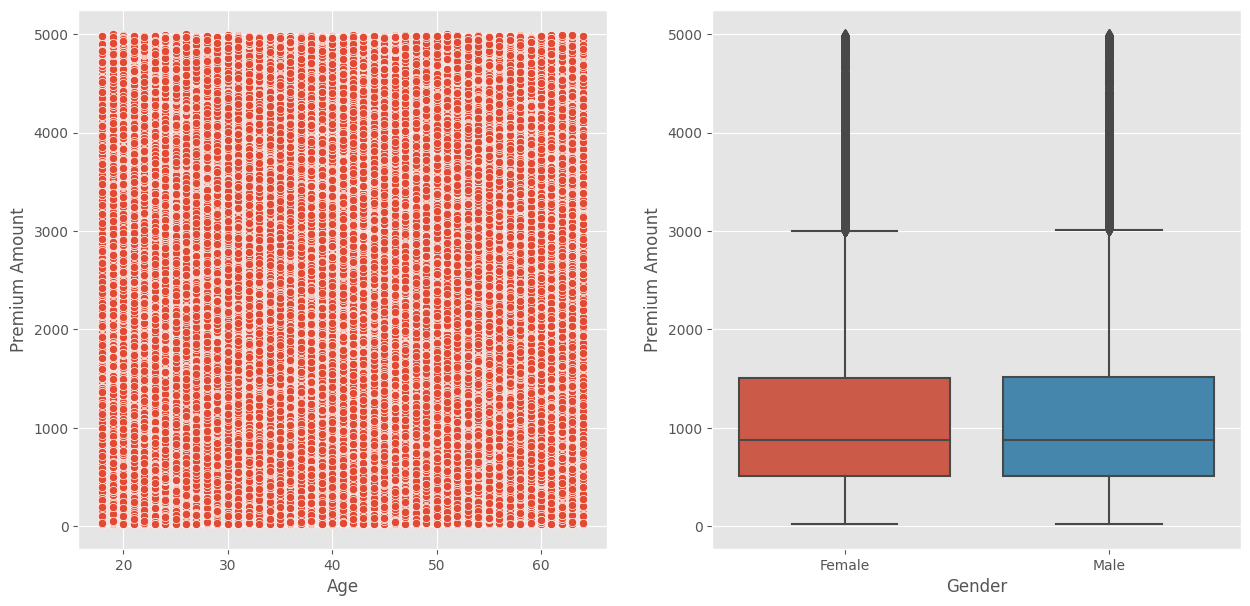

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

plt_1 = sns.scatterplot(data=train, x='Age', y='Premium Amount', ax=ax[0])
plt_2 = sns.boxplot(data=train, x='Gender', y='Premium Amount', ax=ax[1]);

From the above charts, there is no interesting relationship that can be exploited for modeling purposes.

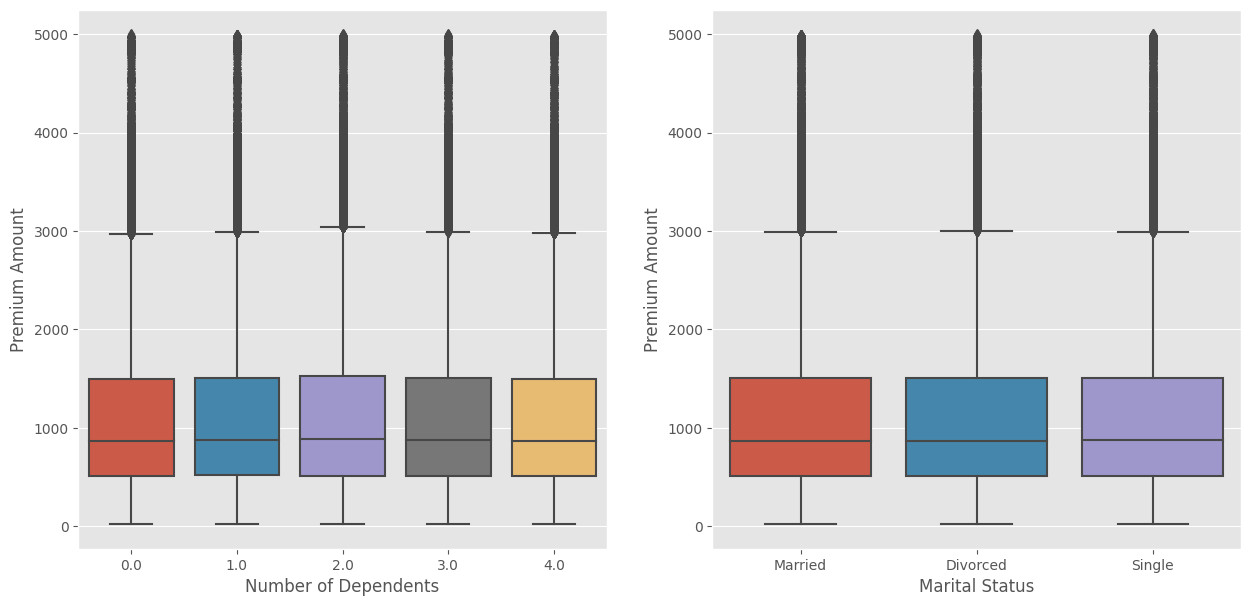

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

plt_1 = sns.boxplot(data=train, x='Number of Dependents', y='Premium Amount', ax=ax[0])
plt_2 = sns.boxplot(data=train, x='Marital Status', y='Premium Amount', ax=ax[1]);

From the above charts, there is no interesting relationship that can be exploited for modeling purposes.



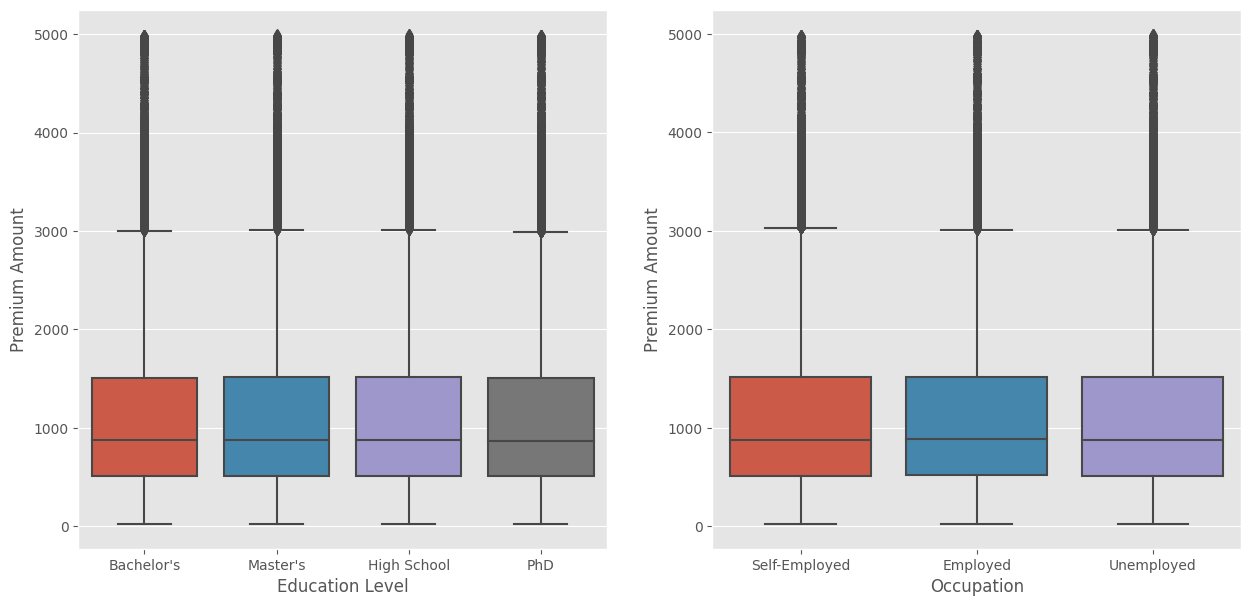

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

plt_1 = sns.boxplot(data=train, x='Education Level', y='Premium Amount', ax=ax[0])
plt_2 = sns.boxplot(data=train, x='Occupation', y='Premium Amount', ax=ax[1]);

[link text](https://)From the above charts, there is no interesting relationship that can be exploited for modeling purposes.

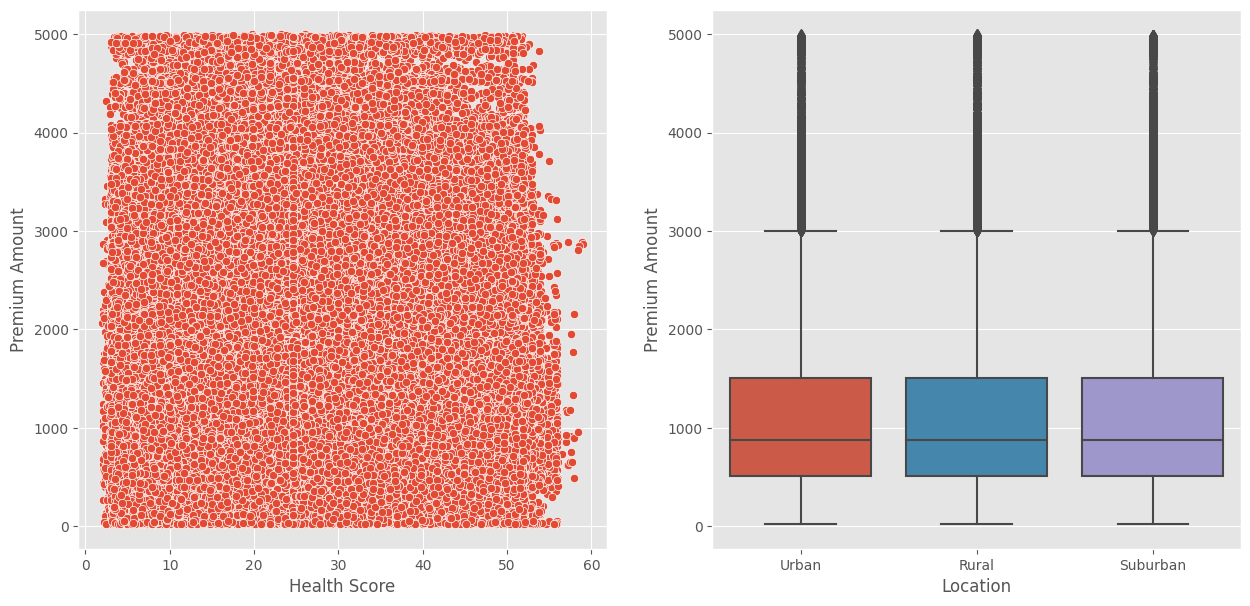

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

plt_1 = sns.scatterplot(data=train, x='Health Score', y='Premium Amount', ax=ax[0])
plt_2 = sns.boxplot(data=train, x='Location', y='Premium Amount', ax=ax[1]);

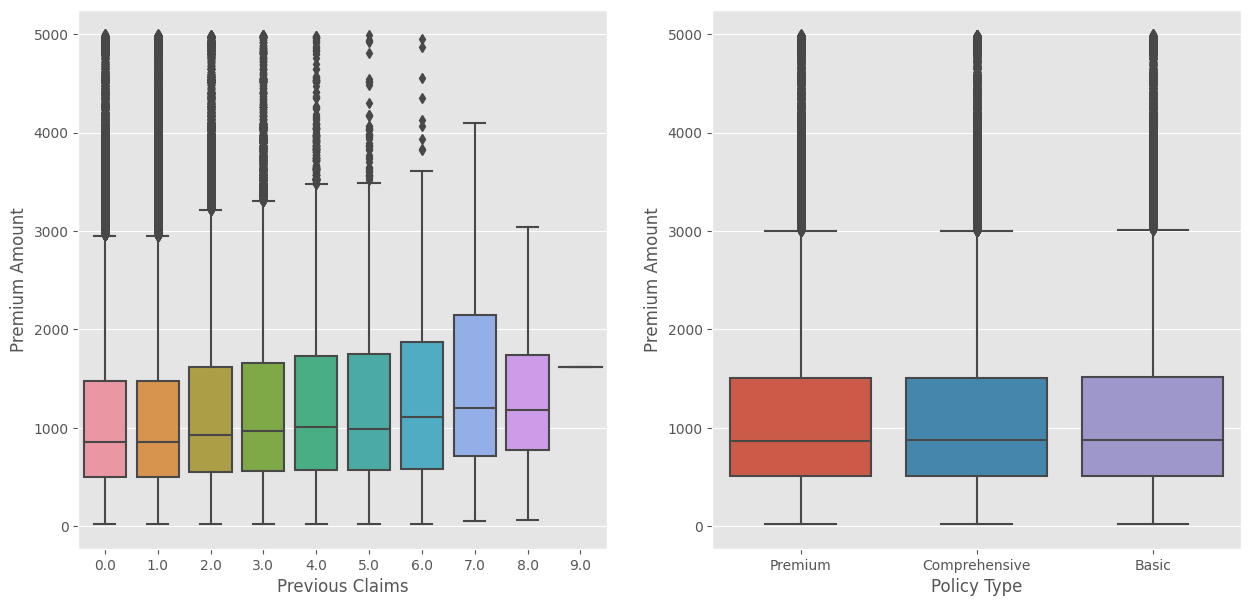

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

plt_1 = sns.boxplot(data=train, x='Previous Claims', y='Premium Amount', ax=ax[0])
plt_2 = sns.boxplot(data=train, x='Policy Type', y='Premium Amount', ax=ax[1]);

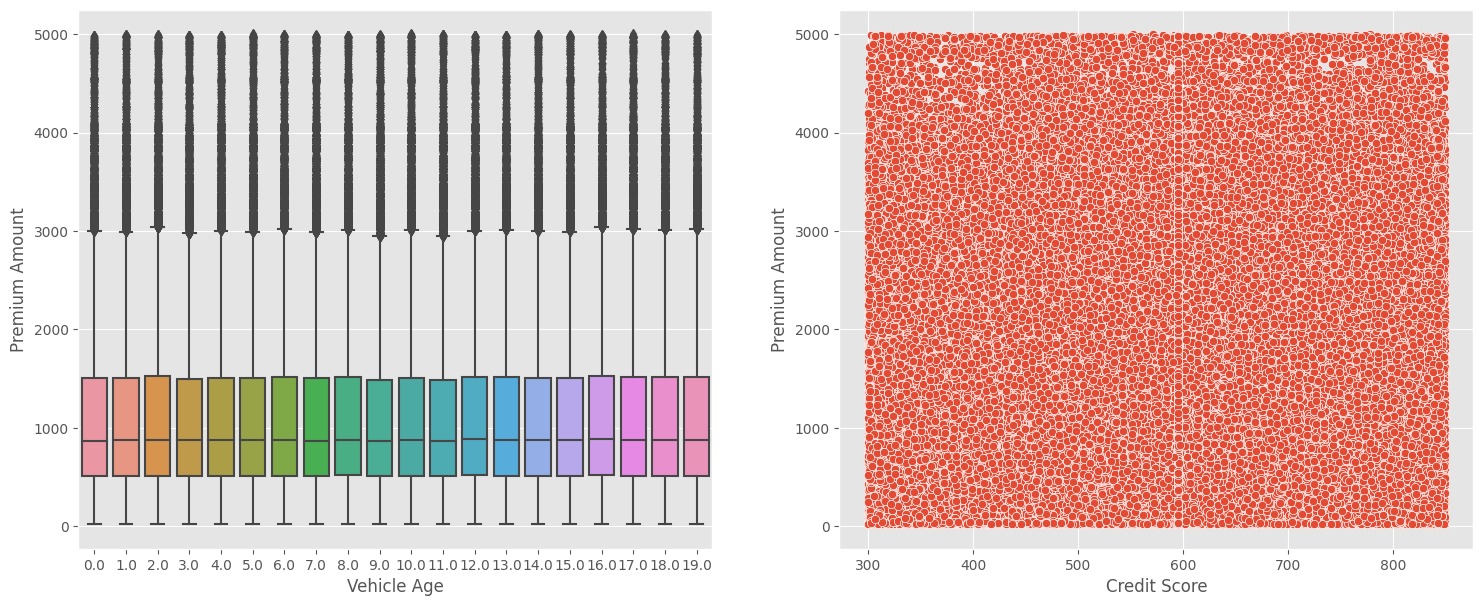

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

plt_1 = sns.boxplot(data=train, x='Vehicle Age', y='Premium Amount', ax=ax[0])
plt_2 = sns.scatterplot(data=train, x='Credit Score', y='Premium Amount', ax=ax[1]);

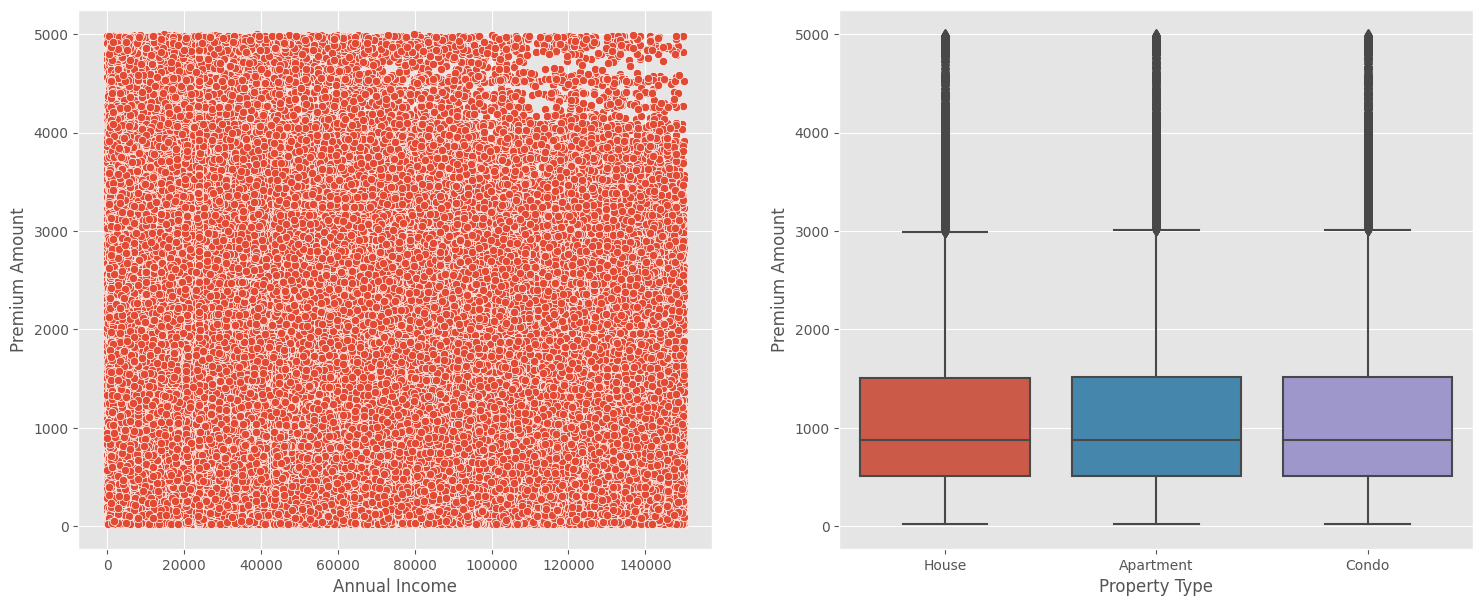

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

plt_1 = sns.scatterplot(data=train, x='Annual Income', y='Premium Amount', ax=ax[0])
plt_2 = sns.boxplot(data=train, x='Property Type', y='Premium Amount', ax=ax[1]);

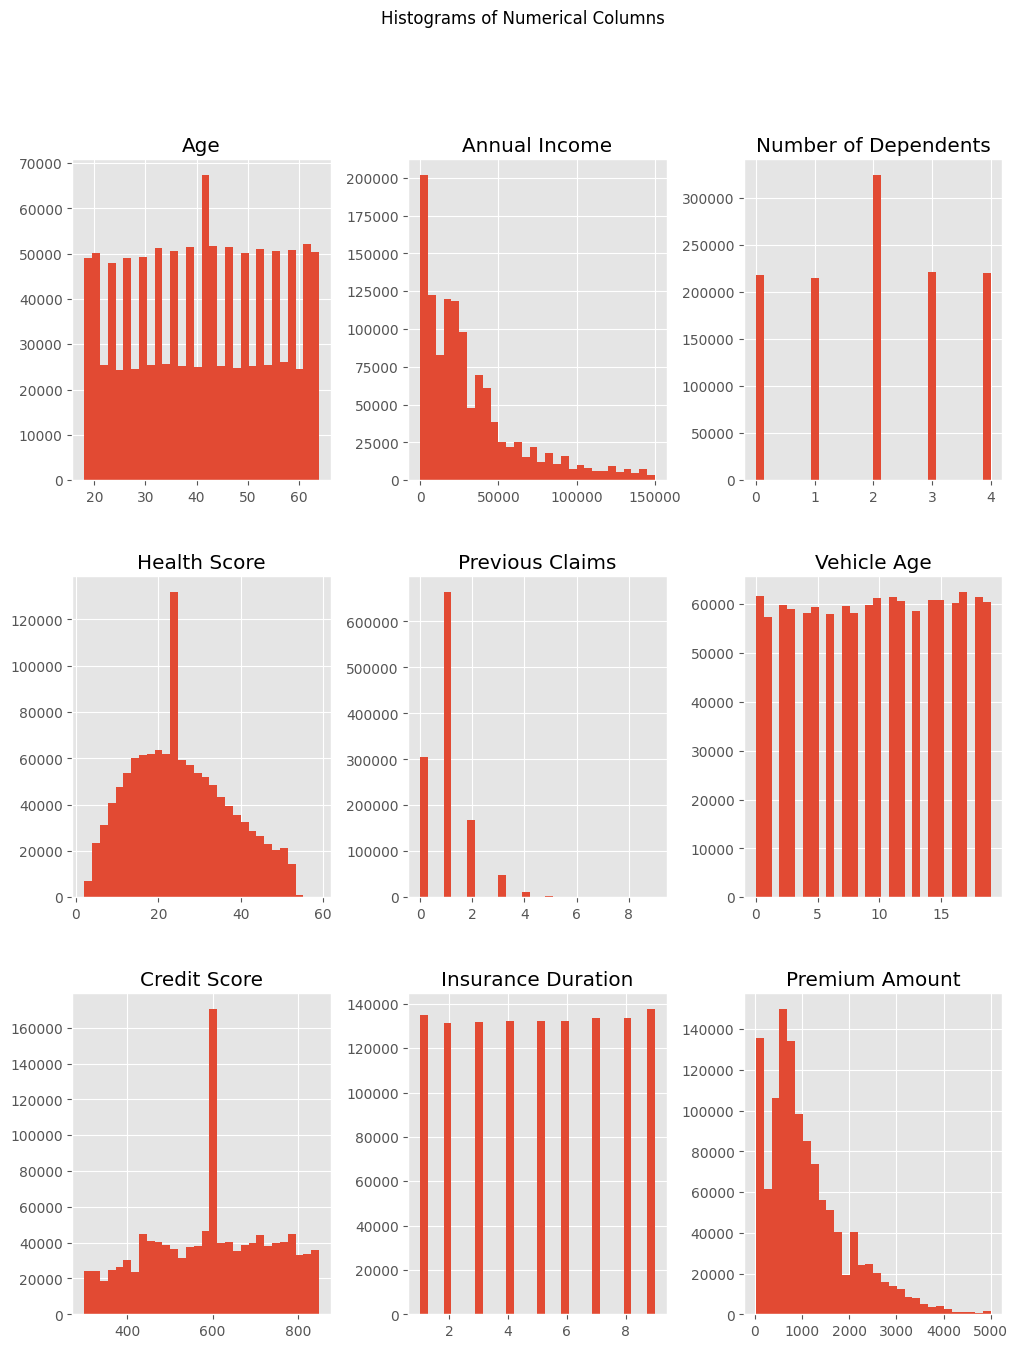

In [ ]:
train[numeric_records.columns].hist(bins=30, figsize=(12, 15))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

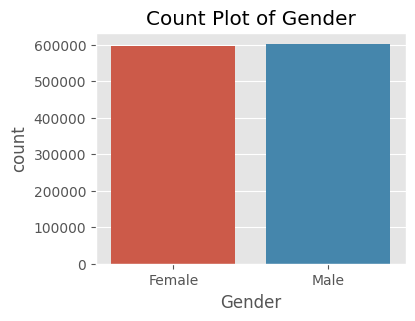

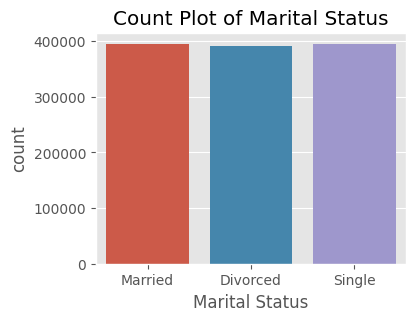

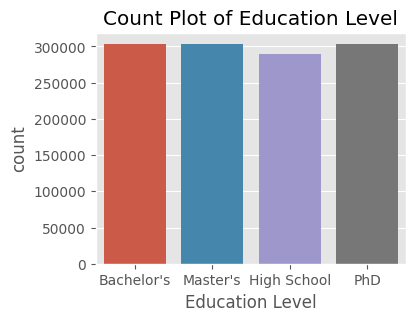

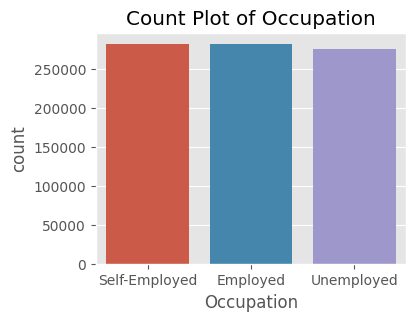

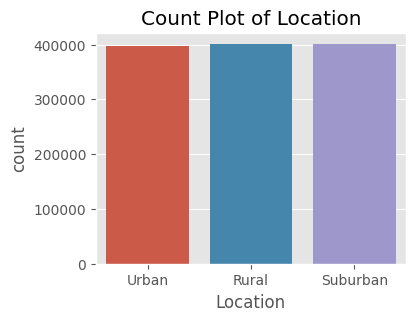

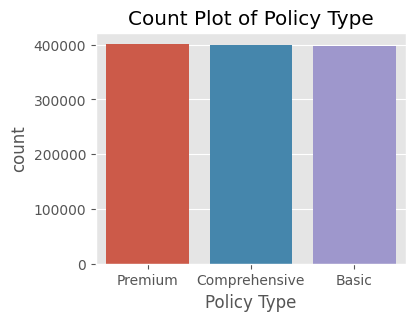

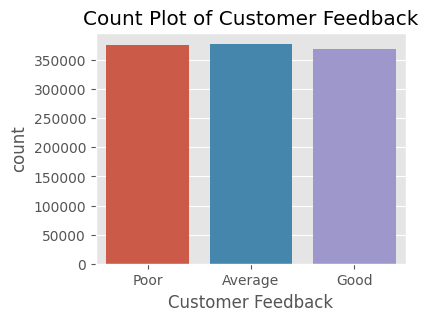

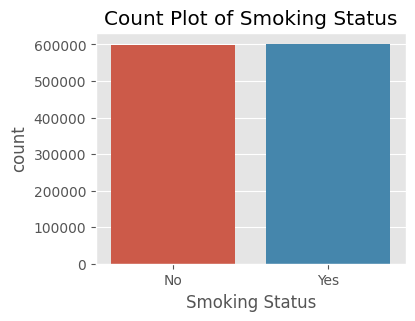

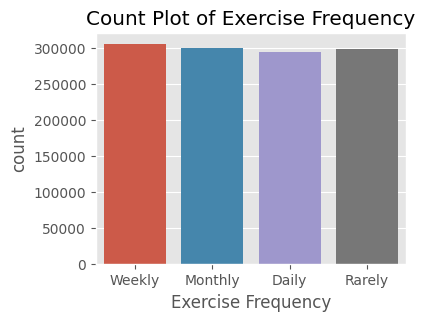

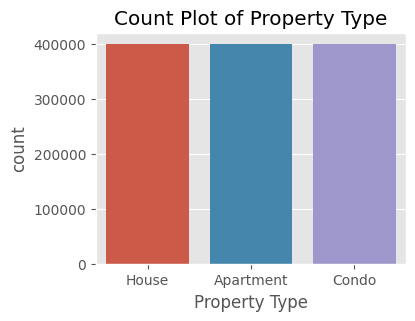

In [ ]:
for col in categorical_records.columns:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=col, data=train)
    plt.title(f'Count Plot of {col}')
    plt.show()


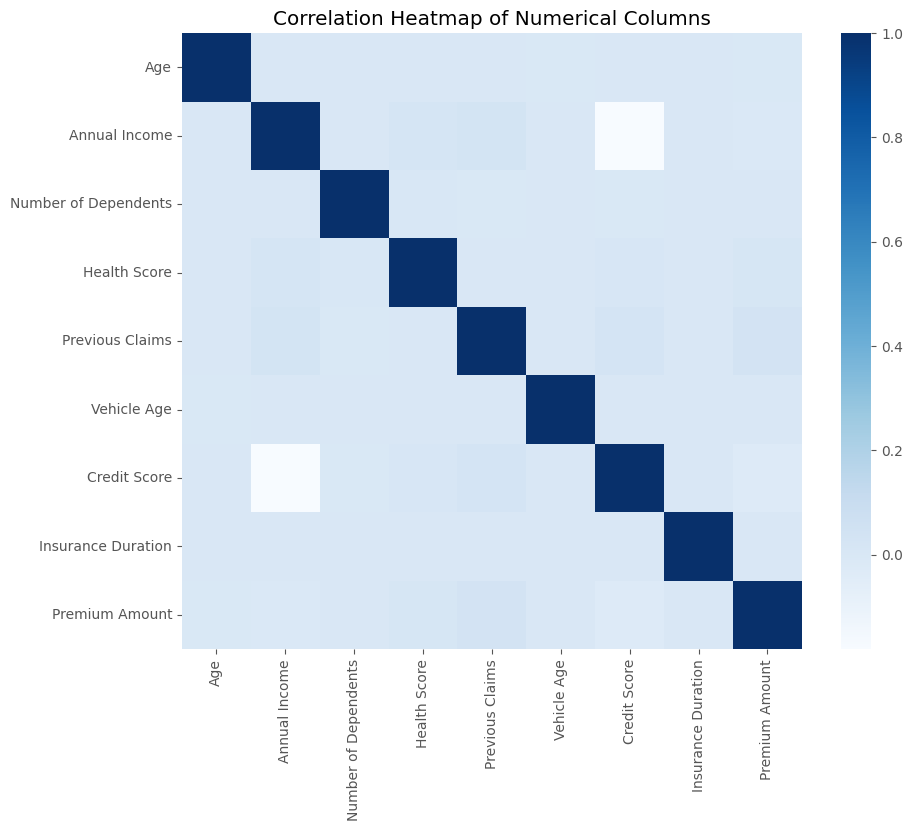

In [ ]:
corr_matrix = train[numeric_records.columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap = 'Blues')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# PreProcessing

## Handle Missing Values

In [ ]:
categorical_records.columns

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')

In [ ]:
categorical_records.isnull().sum()

Gender                     0
Marital Status         18529
Education Level            0
Occupation            358075
Location                   0
Policy Type                0
Customer Feedback      77824
Smoking Status             0
Exercise Frequency         0
Property Type              0
dtype: int64

## preprocess_categorical_features

In [ ]:
def preprocess_categorical_features(df):
    """
    Preprocess the categorical features by filling in missings.

    Args:
        df: pandas dataframe

    Returns: pandas dataframe with filled missings

    """

    df = df.copy()
    df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])
    df['Occupation'] = df['Occupation'].fillna('Unkown')
    df['Customer Feedback'] = df['Customer Feedback'].fillna('Unknown')

    return df

In [ ]:
train_processed = preprocess_categorical_features(train)
train_processed.head()

Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  19.0  Female        10049.0        Married                   1.0   
1  39.0  Female        31678.0       Divorced                   3.0   
2  23.0    Male        25602.0       Divorced                   3.0   
3  21.0    Male       141855.0        Married                   2.0   
4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location    Policy Type  ...  \
0      Bachelor's  Self-Employed     22.598761     Urban        Premium  ...   
1        Master's         Unkown     15.569731     Rural  Comprehensive  ...   
2     High School  Self-Employed     47.177549  Suburban        Premium  ...   
3      Bachelor's         Unkown     10.938144     Rural          Basic  ...   
4      Bachelor's  Self-Employed     20.376094     Rural        Premium  ...   

   Customer Feedback  Smoking Status  Exercise Frequency  Property Type  \
0               Poor              No              Weekly          House   
1            Average             Yes             Monthly          House   
2               Good             Yes              Weekly          House   
3               Poor             Yes               Daily      Apartment   
4               Poor             Yes              Weekly          House   

  Premium Amount Policy Start Year Policy Start Month Policy Start Day  \
0         2869.0              2023                 12               23   
1         1483.0              2023                  6               12   
2          567.0              2023                  9               30   
3          765.0              2024                  6               12   
4         2022.0              2021                 12                1   

   Policy Start DayOfWeek  Policy Tenure  
0                       5       0.974675  
1                       0       1.505818  
2                       5       1.204654  
3                       2       0.503765  
4                       2       3.033539  

[5 rows x 24 columns]

In [ ]:
test_processed = preprocess_categorical_features(test)
test_processed.head()

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  1200000  28.0  Female         2310.0         Single                   4.0   
1  1200001  31.0  Female       126031.0        Married                   2.0   
2  1200002  47.0  Female        17092.0       Divorced                   0.0   
3  1200003  28.0  Female        30424.0       Divorced                   3.0   
4  1200004  24.0    Male        10863.0       Divorced                   2.0   

  Education Level     Occupation  Health Score  Location  ...  \
0      Bachelor's  Self-Employed      7.657981     Rural  ...   
1        Master's  Self-Employed     13.381379  Suburban  ...   
2             PhD     Unemployed     24.354527     Urban  ...   
3             PhD  Self-Employed      5.136225  Suburban  ...   
4     High School     Unemployed     11.844155  Suburban  ...   

  Insurance Duration  Customer Feedback  Smoking Status  Exercise Frequency  \
0                1.0               Poor             Yes              Weekly   
1                8.0               Good             Yes              Rarely   
2                9.0            Average             Yes             Monthly   
3                5.0               Poor             Yes               Daily   
4                7.0            Average              No              Weekly   

   Property Type Policy Start Year Policy Start Month Policy Start Day  \
0          House              2023                  6                4   
1      Apartment              2024                  4               22   
2          Condo              2023                  4                5   
3          House              2023                 10               25   
4          House              2021                 11               26   

  Policy Start DayOfWeek  Policy Tenure  
0                      6       1.527721  
1                      0       0.643395  
2                      2       1.691992  
3                      2       1.136208  
4                      4       3.047228  

[5 rows x 24 columns]

In [ ]:
train.select_dtypes(include=['object']).isnull().sum()

Gender                     0
Marital Status         18529
Education Level            0
Occupation            358075
Location                   0
Policy Type                0
Customer Feedback      77824
Smoking Status             0
Exercise Frequency         0
Property Type              0
dtype: int64

In [ ]:
test.select_dtypes(include=['object']).isnull().sum()

Gender                     0
Marital Status         12336
Education Level            0
Occupation            239125
Location                   0
Policy Type                0
Customer Feedback      52276
Smoking Status             0
Exercise Frequency         0
Property Type              0
dtype: int64

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

def df_after_label_encoding(df):
    df = df.copy()
    df['Education Level'] = label_encoder.fit_transform(df['Education Level'])
    df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
    df['Policy Type'] = label_encoder.fit_transform(df['Policy Type'])
    # One-Hot Encoding for nominal data
    df = pd.get_dummies(df, columns=['Gender', 'Location', 'Marital Status', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Occupation', 'Policy Type'], drop_first=True)
    # df['Policy Type'].map(df.groupby('Policy Type')['Premium Amount'].mean())
    return df

In [ ]:
train_encoded = df_after_label_encoding(train_processed)
train_encoded.head()

Age  Annual Income  Number of Dependents  Education Level  Health Score  \
0  19.0        10049.0                   1.0                0     22.598761   
1  39.0        31678.0                   3.0                2     15.569731   
2  23.0        25602.0                   3.0                1     47.177549   
3  21.0       141855.0                   2.0                0     10.938144   
4  21.0        39651.0                   1.0                0     20.376094   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              2.0         17.0         372.0                 5.0   
1              1.0         12.0         694.0                 2.0   
2              1.0         14.0         595.0                 3.0   
3              1.0          0.0         367.0                 1.0   
4              0.0          8.0         598.0                 4.0   

  Customer Feedback  ...  Exercise Frequency_Monthly  \
0              Poor  ...                       False   
1           Average  ...                        True   
2              Good  ...                       False   
3              Poor  ...                       False   
4              Poor  ...                       False   

   Exercise Frequency_Rarely  Exercise Frequency_Weekly  Property Type_Condo  \
0                      False                       True                False   
1                      False                      False                False   
2                      False                       True                False   
3                      False                      False                False   
4                      False                       True                False   

   Property Type_House  Occupation_1  Occupation_2  Occupation_3  \
0                 True          True         False         False   
1                 True         False         False          True   
2                 True          True         False         False   
3                False         False         False          True   
4                 True          True         False         False   

   Policy Type_1  Policy Type_2  
0          False           True  
1           True          False  
2          False           True  
3          False          False  
4          False           True  

[5 rows x 32 columns]

In [ ]:
print(train['Education Level'][:4].unique)
categorical_records['Education Level'][:4].unique

<bound method Series.unique of 0     Bachelor's
1       Master's
2    High School
3     Bachelor's
Name: Education Level, dtype: object>


<bound method Series.unique of 0     Bachelor's
1       Master's
2    High School
3     Bachelor's
Name: Education Level, dtype: object>

In [ ]:
test_encoded = df_after_label_encoding(test_processed)
test_encoded.head()

id   Age  Annual Income  Number of Dependents  Education Level  \
0  1200000  28.0         2310.0                   4.0                0   
1  1200001  31.0       126031.0                   2.0                2   
2  1200002  47.0        17092.0                   0.0                3   
3  1200003  28.0        30424.0                   3.0                3   
4  1200004  24.0        10863.0                   2.0                1   

   Health Score  Previous Claims  Vehicle Age  Credit Score  \
0      7.657981              1.0         19.0         595.0   
1     13.381379              1.0         14.0         372.0   
2     24.354527              1.0         16.0         819.0   
3      5.136225              1.0          3.0         770.0   
4     11.844155              1.0         14.0         755.0   

   Insurance Duration  ... Exercise Frequency_Monthly  \
0                 1.0  ...                      False   
1                 8.0  ...                      False   
2                 9.0  ...                       True   
3                 5.0  ...                      False   
4                 7.0  ...                      False   

   Exercise Frequency_Rarely  Exercise Frequency_Weekly  Property Type_Condo  \
0                      False                       True                False   
1                       True                      False                False   
2                      False                      False                 True   
3                      False                      False                False   
4                      False                       True                False   

   Property Type_House  Occupation_1  Occupation_2  Occupation_3  \
0                 True          True         False         False   
1                False          True         False         False   
2                False         False          True         False   
3                 True          True         False         False   
4                 True         False          True         False   

   Policy Type_1  Policy Type_2  
0          False          False  
1          False           True  
2           True          False  
3           True          False  
4          False           True  

[5 rows x 32 columns]

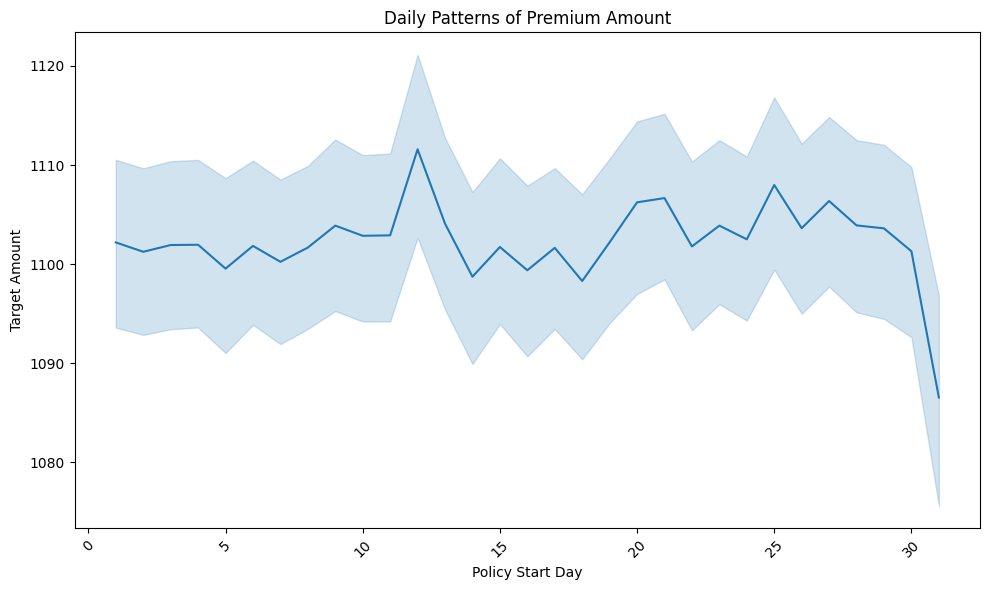

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Policy Start Day', y='Premium Amount', data=train)
plt.xlabel('Policy Start Day')
plt.ylabel('Target Amount')
plt.title('Daily Patterns of Premium Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

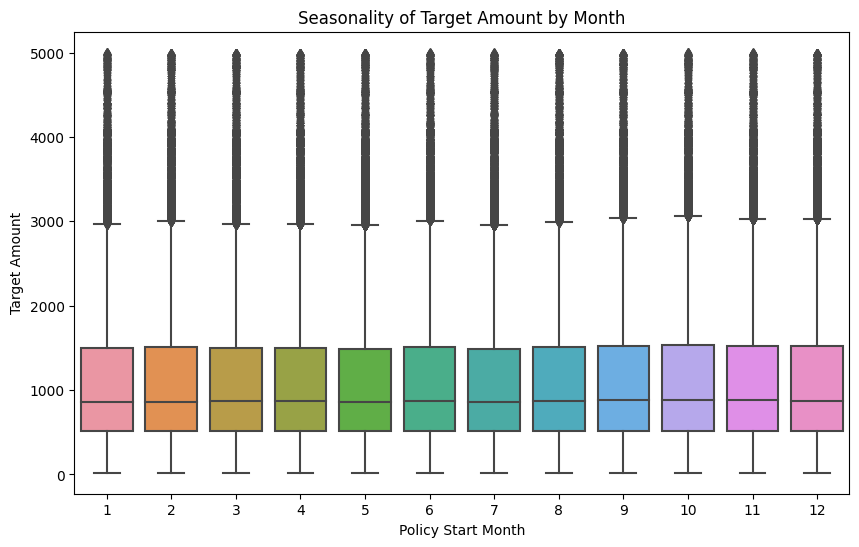

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Policy Start Month', y='Premium Amount', data=train)
plt.xlabel('Policy Start Month')
plt.ylabel('Target Amount')
plt.title('Seasonality of Target Amount by Month')
plt.show()

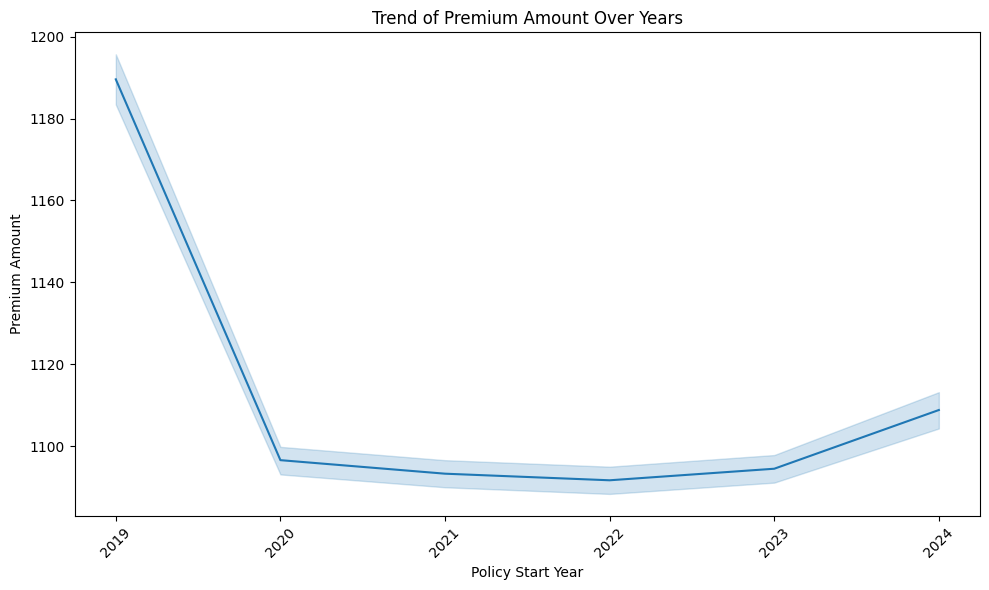

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Policy Start Year', y='Premium Amount', data=train)
plt.xlabel('Policy Start Year')
plt.ylabel('Premium Amount')
plt.title('Trend of Premium Amount Over Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Handle Outliers
Outliers are data points significantly different from the rest of the dataset. Identifying and handling outliers is crucial because they can skew model performance and impact the interpretation of results

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

def draw_box_plot(df, column, title, xlabel):
    sns.boxplot(x=df[column])

    plt.title(title)
    plt.xlabel(xlabel)

    plt.show()

In [ ]:
def draw_box_plots(df, columns, titles, xlabels):
    # Create a figure with 1 row and len(columns) columns
    fig, axes = plt.subplots(1, len(columns), figsize=(6, 5))

    # If there's only one column, convert axes to a list to make it iterable
    if len(columns) == 1:
        axes = [axes]

    # Create box plots for each column
    for i, (column, title, xlabel) in enumerate(zip(columns, titles, xlabels)):
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(title)
        axes[i].set_xlabel(xlabel)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

In [ ]:
def draw_multiple_box_plots(df, columns):
    # Calculate number of rows needed (2 columns per row)
    num_rows = (len(columns) + 1) // 2

    # Create figure with appropriate size
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))

    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Create box plots
    for i, column in enumerate(columns):
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')
        axes[i].set_xlabel(column)

    # Remove extra subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

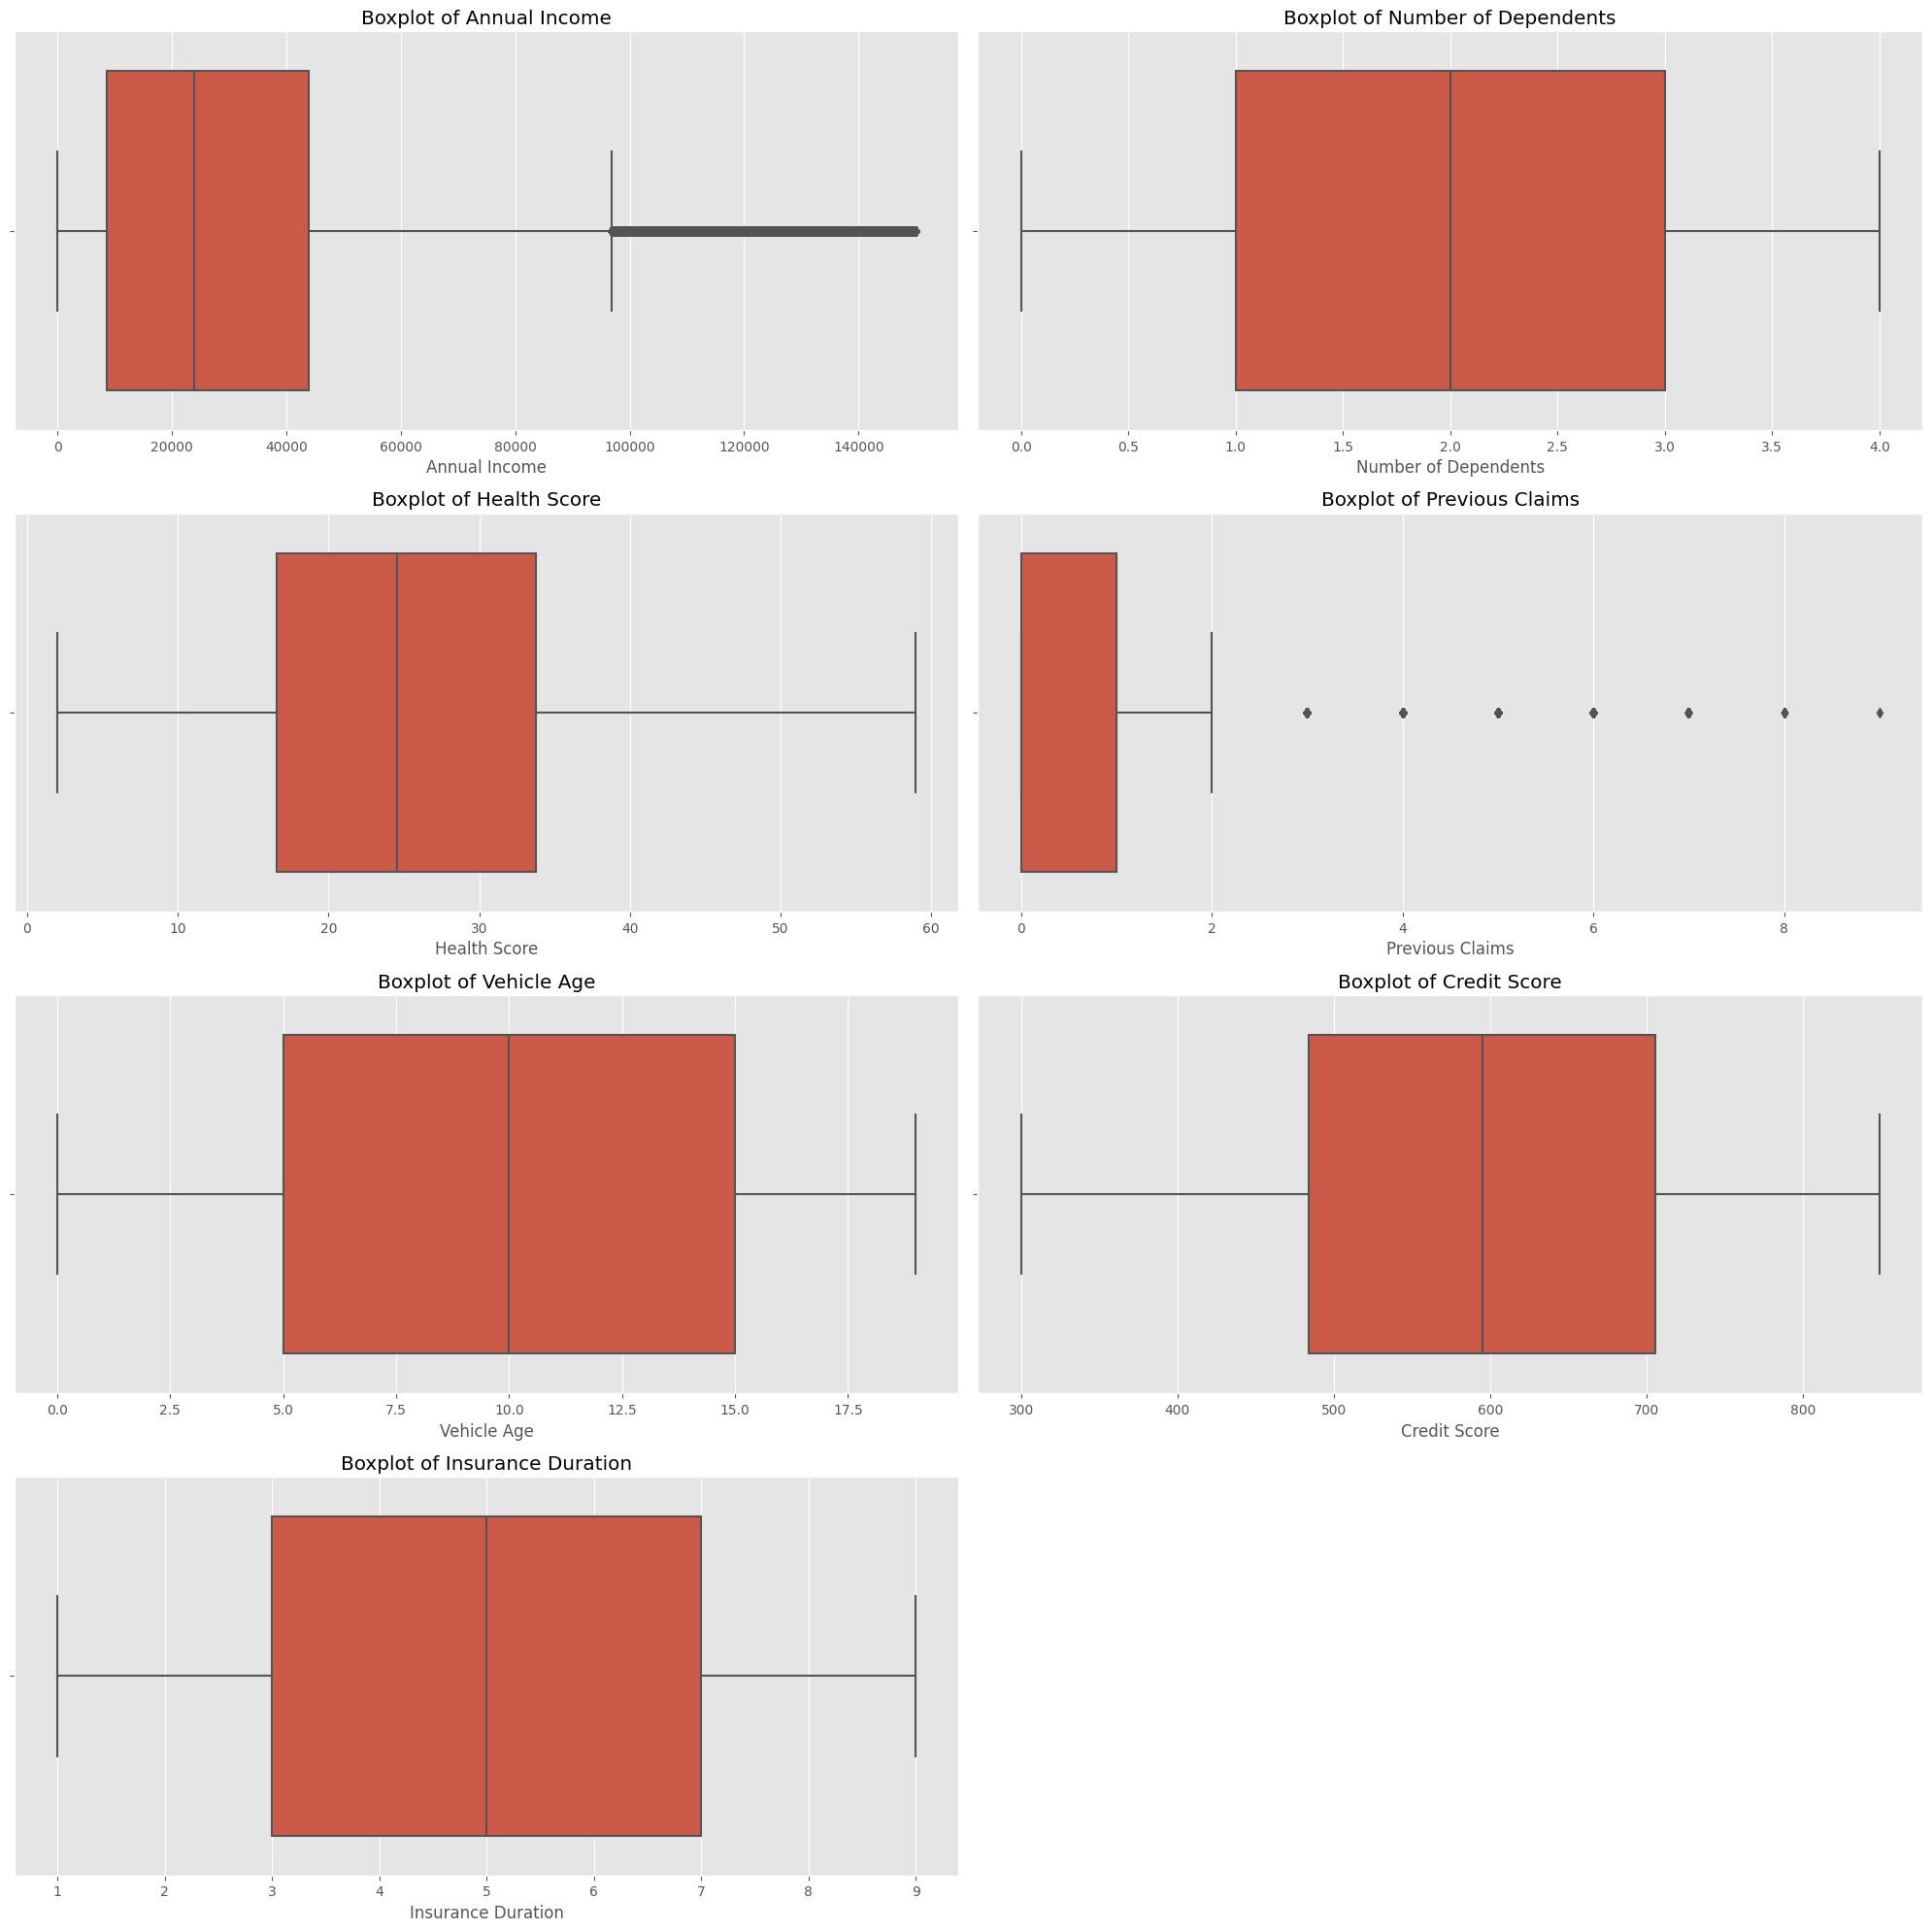

In [ ]:
draw_multiple_box_plots(train, [
    'Annual Income',
    'Number of Dependents',
    'Health Score',
    'Previous Claims',
    'Vehicle Age',
    'Credit Score',
    'Insurance Duration'
])

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
# outliers, lower_bound, upper_bound=detect_outliers_iqr(train, 'Annual Income')
# outliers.shape

In [ ]:
def analyze_outliers(df, columns):
    outlier_summary = {}

    for column in columns:
        # Calculate IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate bounds
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        outlier_summary[column] = {
            'total_rows': len(df),
            'outliers_count': len(outliers),
            'outliers_percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

    return outlier_summary

In [ ]:
analyze_outliers(train, numeric_records.columns)

{'Age': {'total_rows': 1200000,
  'outliers_count': 0,
  'outliers_percentage': 0.0,
  'lower_bound': -4.5,
  'upper_bound': 87.5},
 'Annual Income': {'total_rows': 1200000,
  'outliers_count': 70466,
  'outliers_percentage': 5.872166666666667,
  'lower_bound': -44289.0,
  'upper_bound': 96871.0},
 'Number of Dependents': {'total_rows': 1200000,
  'outliers_count': 0,
  'outliers_percentage': 0.0,
  'lower_bound': -2.0,
  'upper_bound': 6.0},
 'Health Score': {'total_rows': 1200000,
  'outliers_count': 0,
  'outliers_percentage': 0.0,
  'lower_bound': -9.272905897836477,
  'upper_bound': 59.60036772237997},
 'Previous Claims': {'total_rows': 1200000,
  'outliers_count': 62066,
  'outliers_percentage': 5.172166666666667,
  'lower_bound': -1.5,
  'upper_bound': 2.5},
 'Vehicle Age': {'total_rows': 1200000,
  'outliers_count': 0,
  'outliers_percentage': 0.0,
  'lower_bound': -10.0,
  'upper_bound': 30.0},
 'Credit Score': {'total_rows': 1200000,
  'outliers_count': 0,
  'outliers_percent

There are three approaches to dealing with outliers:
* Trimming/Remove the outliers
* Quantile Based Flooring and Capping
  - In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.
* Mean/Median Imputation
  - As the mean value is highly influenced by the outlier treatment, it is advised to replace the outliers with the median value.

In [ ]:
def outlier_data_imputation(data, column, method="mean"):
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data, column)
    if not len(outliers):
        print({
        "method": method,
        "impute_value": None,
        "outliers_count":  len(outliers),
        "column": column
        })
        return data
    elif method == "mean":
        impute_value = data[column].mean()
    elif method == "median":
        impute_value = data[column].median()
    else:
        raise ValueError("Method must be 'mean' or 'median'")
    print({
        "method": method,
        "impute_value": impute_value,
        "outliers_count":  len(outliers),
        "column": column
        })
    #imputation
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = impute_value

    return data

In [ ]:
def visualize_imputation_impact(original_df, processed_df, columns, imputation_method):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Create a figure with subplots
    fig, axes = plt.subplots(len(columns), 2, figsize=(15, 4*len(columns)))

    for i, column in enumerate(columns):
        # Original distribution
        sns.boxplot(x=original_df[column], ax=axes[i, 0])
        axes[i, 0].set_title(f'Original {column}')

        # Processed distribution
        sns.boxplot(x=processed_df[column], ax=axes[i, 1])
        axes[i, 1].set_title(f'{imputation_method.capitalize()} Imputed {column}')

    plt.tight_layout()
    plt.show()

In [ ]:
def comprehensive_outlier_handling(df, columns, imputation_method='mean'):
    df_processed = df.copy()
    for column in columns:
        df_processed = outlier_data_imputation(df_processed, column, imputation_method)
    visualize_imputation_impact(df, df_processed, columns, imputation_method)
    return df_processed

{'method': 'mean', 'impute_value': None, 'outliers_count': 0, 'column': 'Age'}
{'method': 'mean', 'impute_value': 32414.310064166668, 'outliers_count': 70466, 'column': 'Annual Income'}
{'method': 'mean', 'impute_value': None, 'outliers_count': 0, 'column': 'Number of Dependents'}
{'method': 'mean', 'impute_value': None, 'outliers_count': 0, 'column': 'Health Score'}
{'method': 'mean', 'impute_value': 1.0018733333333334, 'outliers_count': 62066, 'column': 'Previous Claims'}
{'method': 'mean', 'impute_value': None, 'outliers_count': 0, 'column': 'Vehicle Age'}
{'method': 'mean', 'impute_value': None, 'outliers_count': 0, 'column': 'Credit Score'}
{'method': 'mean', 'impute_value': None, 'outliers_count': 0, 'column': 'Insurance Duration'}
{'method': 'mean', 'impute_value': 1102.5448216666666, 'outliers_count': 49320, 'column': 'Premium Amount'}


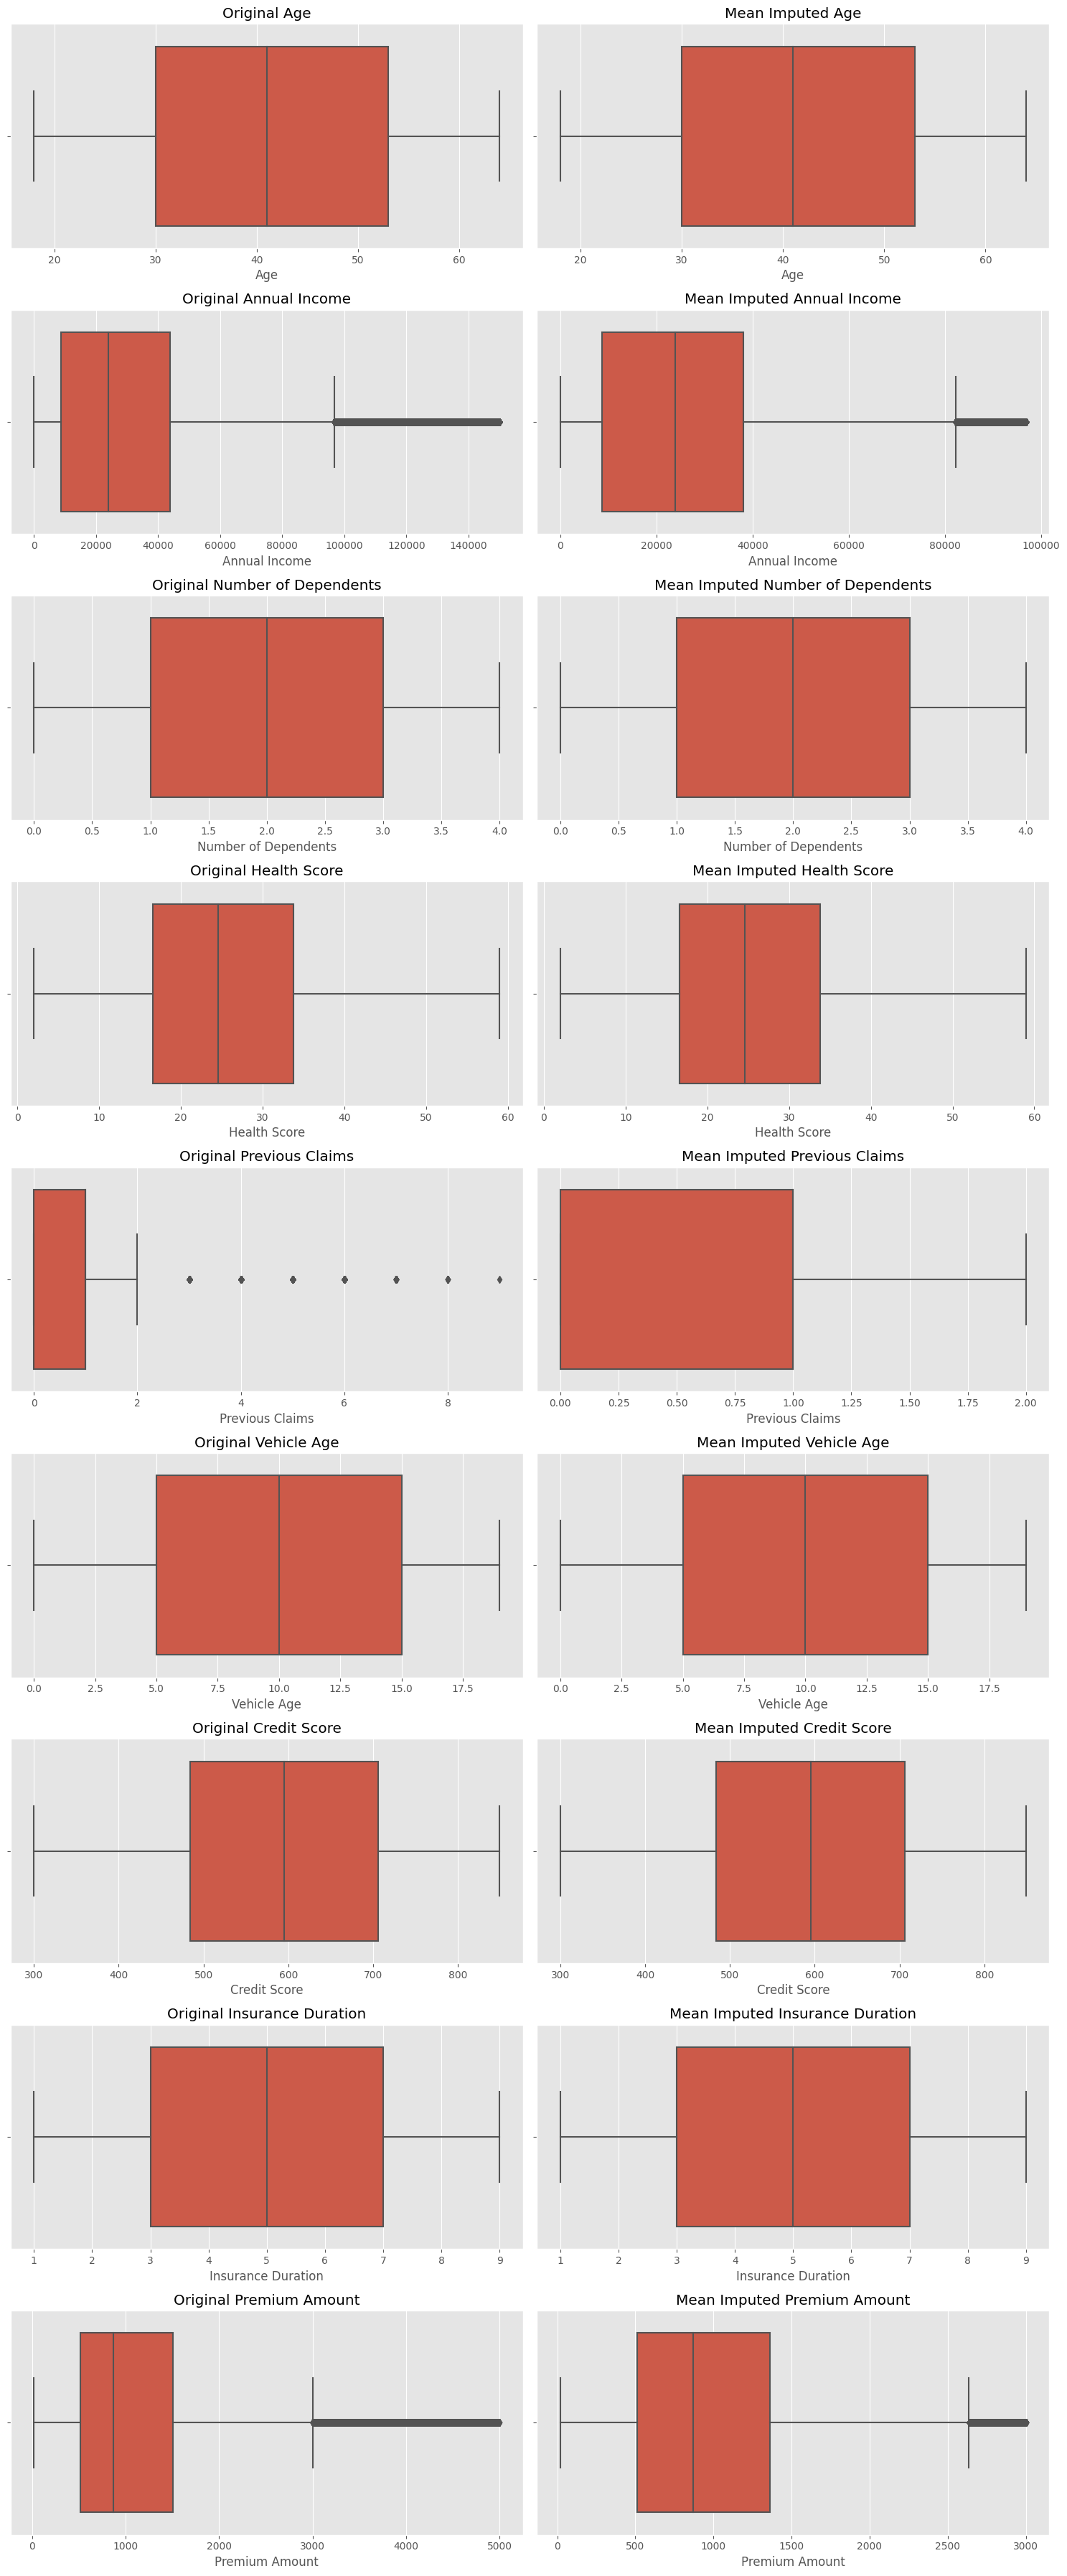

In [ ]:
df_processed = comprehensive_outlier_handling(train, numeric_records.columns, "mean")

{'method': 'median', 'impute_value': None, 'outliers_count': 0, 'column': 'Age'}
{'method': 'median', 'impute_value': 23911.0, 'outliers_count': 70466, 'column': 'Annual Income'}
{'method': 'median', 'impute_value': None, 'outliers_count': 0, 'column': 'Number of Dependents'}
{'method': 'median', 'impute_value': None, 'outliers_count': 0, 'column': 'Health Score'}
{'method': 'median', 'impute_value': 1.0, 'outliers_count': 62066, 'column': 'Previous Claims'}
{'method': 'median', 'impute_value': None, 'outliers_count': 0, 'column': 'Vehicle Age'}
{'method': 'median', 'impute_value': None, 'outliers_count': 0, 'column': 'Credit Score'}
{'method': 'median', 'impute_value': None, 'outliers_count': 0, 'column': 'Insurance Duration'}
{'method': 'median', 'impute_value': 872.0, 'outliers_count': 49320, 'column': 'Premium Amount'}


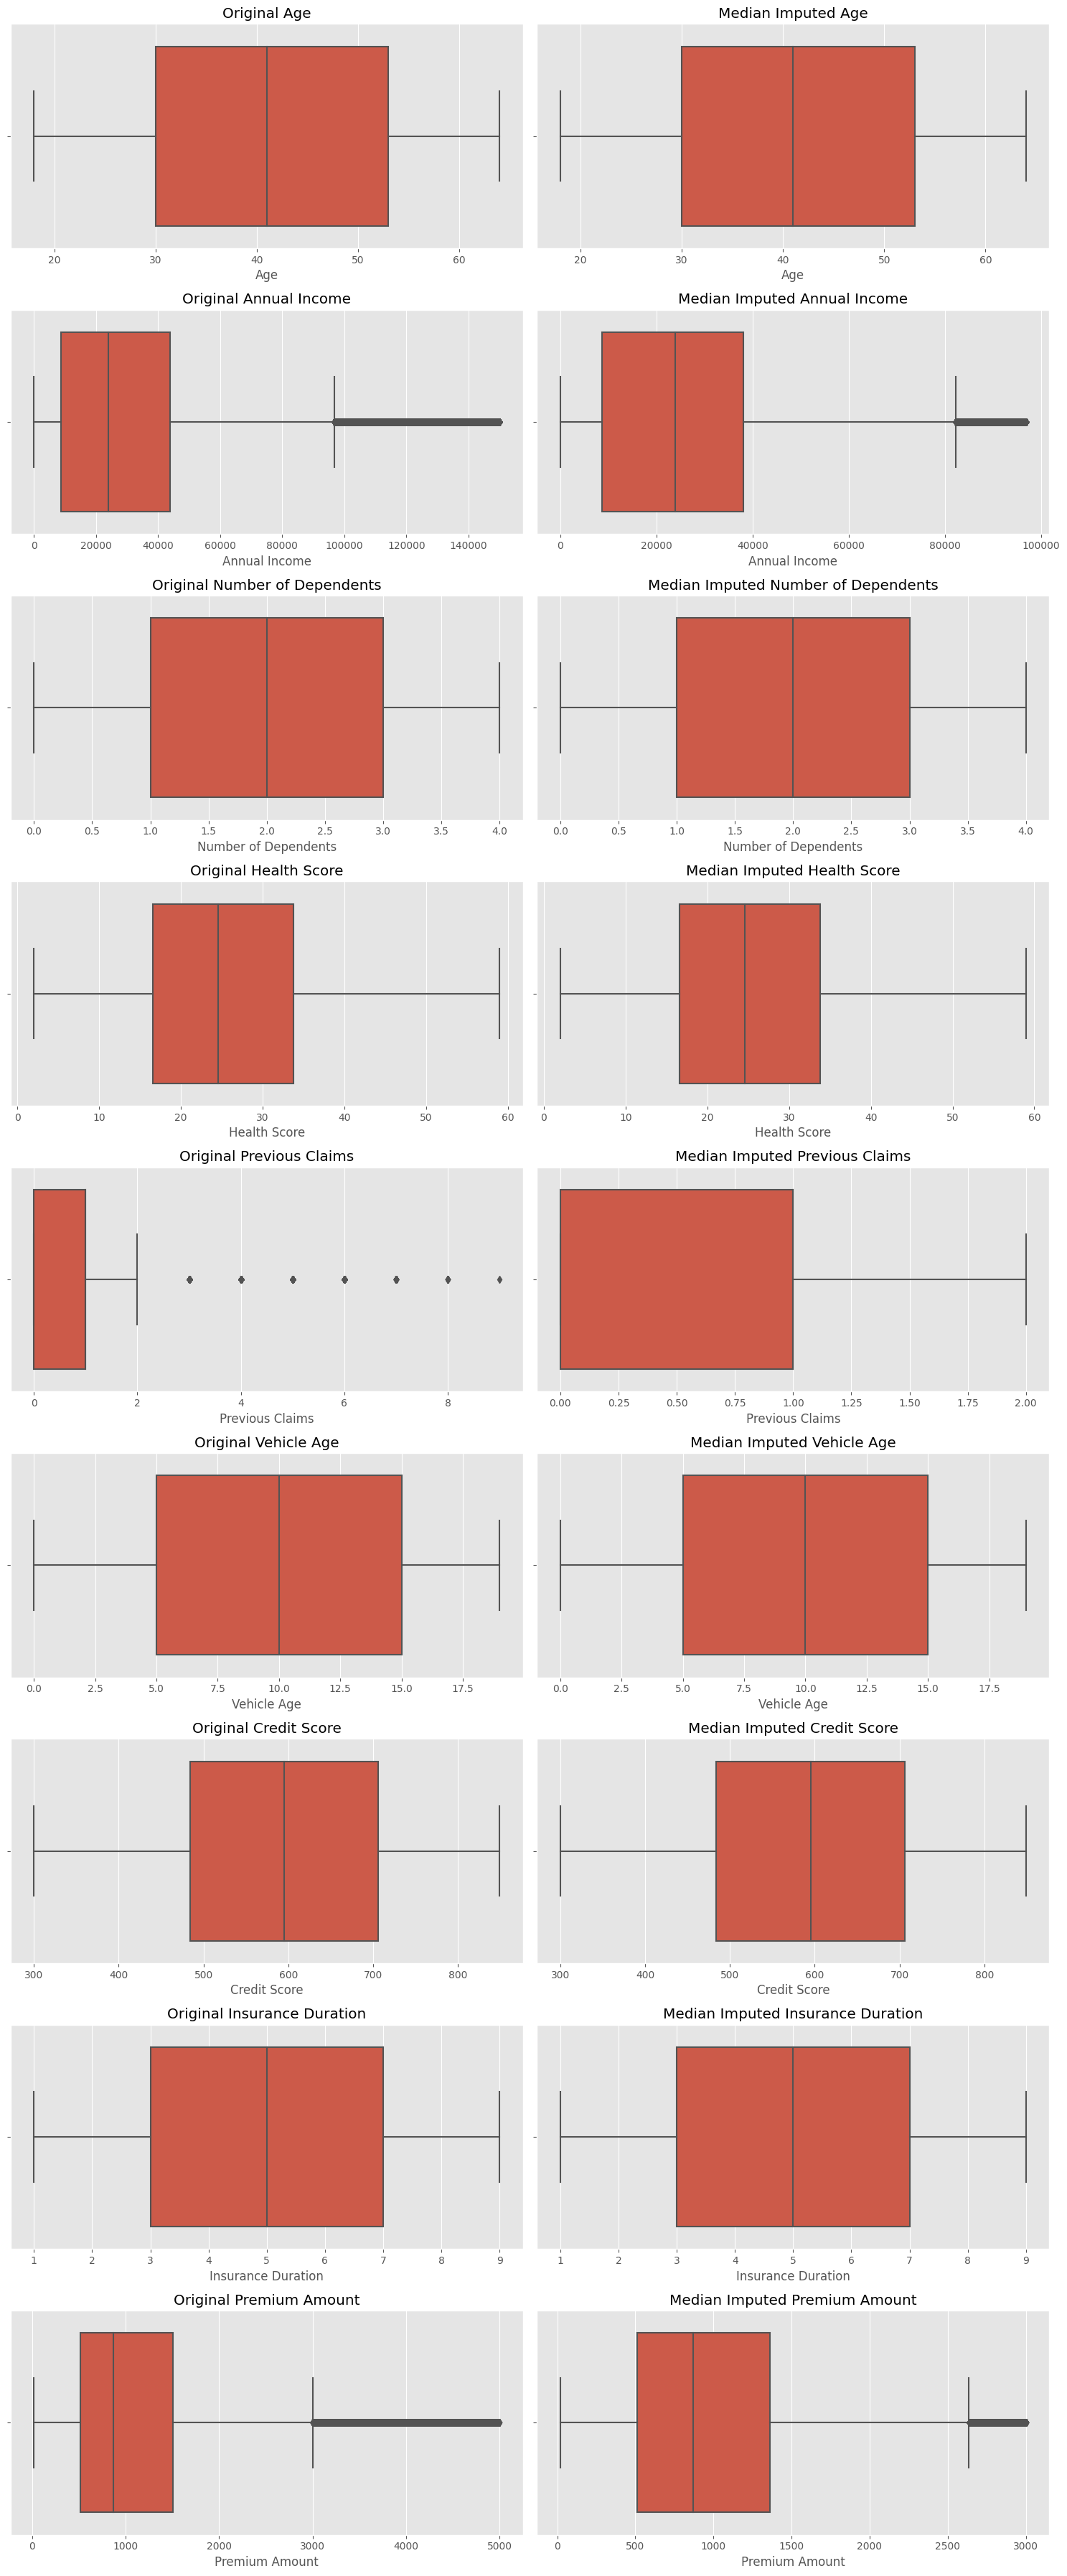

In [ ]:
df_processed_median = comprehensive_outlier_handling(train, numeric_records.columns, "median")

## Normalize/Scale Numerical Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_encoded[numeric_records.columns] = scaler.fit_transform(train_encoded[numeric_records.columns])

In [ ]:
test_numeric_cols = test_encoded.select_dtypes(include=np.number).columns.tolist()
test_categoric_cols = test_encoded.select_dtypes(include=['object']).columns.tolist()
test_encoded[test_numeric_cols] = scaler.fit_transform(test_encoded[test_numeric_cols])

# Modeling

In [ ]:
X = train_encoded.drop(columns=['Premium Amount', 'Customer Feedback'])
y = train_encoded['Premium Amount']
y_log = np.log1p(train_encoded['Premium Amount'])

In [ ]:
numeric_columns = X.select_dtypes(include=np.number).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
y_pred_original = np.expm1(y_pred)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 0.11
MSE: 0.02
R² Score: 0.00


In [ ]:
# For Linear Regression
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))

                       Feature  Coefficient
13               Policy Tenure     0.195740
9            Policy Start Year     0.194718
5              Previous Claims     0.062190
10          Policy Start Month     0.016473
4                 Health Score     0.011045
18       Marital Status_Single     0.001259
11            Policy Start Day     0.000535
28               Policy Type_1     0.000250
17      Marital Status_Married     0.000221
16              Location_Urban     0.000196
29               Policy Type_2     0.000073
15           Location_Suburban     0.000058
14                 Gender_Male     0.000032
19          Smoking Status_Yes    -0.000006
12      Policy Start DayOfWeek    -0.000007
6                  Vehicle Age    -0.000088
20  Exercise Frequency_Monthly    -0.000128
3              Education Level    -0.000174
25                Occupation_1    -0.000215
23         Property Type_Condo    -0.000239
8           Insurance Duration    -0.000240
21   Exercise Frequency_Rarely  

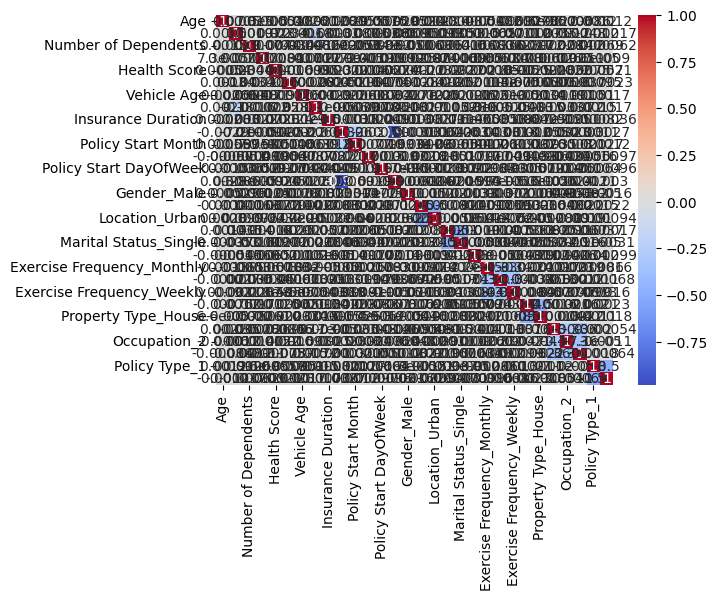

In [ ]:
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, rf_pred)
print(f"Random Forest MAE: {mae_rf:.2f}")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

print(f"R² Score (Polynomial Regression): {r2_score(y_test, y_pred_poly):.2f}")

R² Score (Polynomial Regression): 0.01


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
# Initialize the XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Learning rate
    max_depth=5,  # Maximum depth of a tree
    random_state=42  # For reproducibility
)

# Fit the model on training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)

In [ ]:
y_pred_original = np.expm1(y_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 0.10
MSE: 0.02
RMSE: 0.13
R² Score: 0.05


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1
)

# Fit Grid Search on training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_xgb_model.predict(X_test)
print(f"Best RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best)):.2f}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best RMSE: 0.13


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Numerical preprocessing
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])
numerical_preprocessor

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler())])

In [ ]:
# Categorical preprocessing
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(drop='first', sparse_output=False))
])
categorical_preprocessor

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('one_hot_encoder',
                 OneHotEncoder(drop='first', sparse_output=False))])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_preprocessor, numeric_columns),  # Numerical processing
    ('cat', categorical_preprocessor, categorical_columns)  # Categorical processing
])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age', 'Annual Income',
                                  'Number of Dependents', 'Education Level',
                                  'Health Score', 'Previous Claims',
                                  'Vehicle Age', 'Credit Score',
                                  'Insurance Duration', 'Policy Start Year',
                                  'Policy Start Month', 'Policy Start Day',
                                  'Policy Start DayOfWeek', 'Policy Tenure']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 [])])

In [ ]:
# Full pipeline with model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Annual Income',
                                                   'Number of Dependents',
                                                   'Education Level',
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration',
                                                   'Policy Start Year',
                                                   'Policy Start Month',
                                                   'Policy Start Day',
                                                   'Policy Start DayOfWeek',
                                                   'Policy Tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  [])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# Train the model
model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Annual Income',
                                                   'Number of Dependents',
                                                   'Education Level',
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration',
                                                   'Policy Start Year',
                                                   'Policy Start Month',
                                                   'Policy Start Day',
                                                   'Policy Start DayOfWeek',
                                                   'Policy Tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  [])])),
                ('regressor', RandomForestRegressor(random_state=42))])